<a href="https://colab.research.google.com/github/Odegova-Valerie/Coursework_1/blob/main/OVS_Density_Descriptors.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DEEP EUTECTIC SOLVENTS. DENSITY. Descriptors

## 1. Чтение данных

In [ ]:
# Импорт необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import re
!pip install pubchempy
import pubchempy as pcp
# Импорт необходимых библиотек
!pip install rdkit
from rdkit import Chem
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors3D
from rdkit.Chem import rdchem
from rdkit.Chem import AllChem
from rdkit import DataStructs
from rdkit.ML.Descriptors import MoleculeDescriptors
from rdkit.Chem.rdchem import PeriodicTable, GetPeriodicTable
from rdkit.Chem import Fragments
from rdkit.Chem.rdchem import EditableMol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for pubchempy: filename=PubChemPy-1.0.4-py3-none-any.whl size=13834 sha256=f4e91a4e658675a3ca8856b829782d72023d5ddb6b35d5168e9fbfad16ad80bb
  Stored in directory: /root/.cache/pip/wheels/7c/3d/8c/8192697412e9899dc55bbbb08bbc1197bef333caaa2a71c448
Successfully built pubchempy
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 29.5 MB 1.4 MB/s 


In [ ]:
colors = ['#41395e','#fefa9a', '#ecc2d3', '#ba8fb3', '#fffde1'] # Палетка цветов
density_df = pd.read_excel('density_without_rep.xlsx')
density_df.head()

,Unnamed: 0,Unnamed: 0.1,Number of components,Type of DES,I,II,III,IV,V,Component#1,...,Component#3,X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),"Temperature, K","Density, g/cm^3",Reference (DOI),isomer_smiles#1,isomer_smiles#2,isomer_smiles#3
0,0,0,2,Ⅰ,1,0,0,0,0,zinc chloride,...,NaN,0.5,0.5,NaN,300.2,1.10250,10.1016/j.cclet.2013.09.004,Cl[Zn]Cl,CCCCN1C=C[N+](=C1)C.[Cl-],NaN
1,1,1,2,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,...,NaN,0.5,0.5,NaN,313.2,1.16822,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=NC=NN1,NaN
2,2,2,2,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,...,NaN,0.5,0.5,NaN,313.2,1.46660,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=CC2=NNN=C2C=C1,NaN
3,3,3,2,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,...,NaN,0.5,0.5,NaN,313.2,1.16062,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=NNN=N1,NaN
4,4,4,2,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,...,NaN,0.5,0.5,NaN,313.2,1.19850,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=CC=C2C(=C1)NC=N2,NaN


## 2. Oversampling

In [ ]:
#!pip install -U scikit-learn
#!pip install collection
#!pip install imblearn

In [ ]:
# Импорт
from sklearn import preprocessing
from collections import Counter

In [ ]:
# Вывод количества различных значений в столбце
print(sorted(Counter(density_df['Number of components']).items()))

[(2, 3634), (3, 359)]


In [ ]:
# Разбиение данных на два датасета
loan_app = density_df[density_df['Number of components'] == 2]
loan_ntapp = density_df[density_df['Number of components'] == 3]
print(loan_app.shape, loan_ntapp.shape, density_df.shape)

(3634, 21) (359, 21) (3993, 21)


In [ ]:
# Переменные для oversampling
X = density_df
Y = density_df['Number of components']
X.drop('Number of components', axis = 1, inplace = True)

In [ ]:
# Oversampling
from imblearn import over_sampling # Импорт необходимого модуля
from imblearn.over_sampling import RandomOverSampler # Импорт 
ros = RandomOverSampler(random_state=0)
X_resampled, Y_resampled = ros.fit_resample(X, Y)
print(sorted(Counter(Y_resampled).items()))

[(2, 3634), (3, 3634)]


In [ ]:
# Получим общий датафрейм
density_df_oversamp = X_resampled
density_df_oversamp['Number of components'] = Y_resampled
density_df_oversamp

,Unnamed: 0,Unnamed: 0.1,Type of DES,I,II,III,IV,V,Component#1,Component#2,...,X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),"Temperature, K","Density, g/cm^3",Reference (DOI),isomer_smiles#1,isomer_smiles#2,isomer_smiles#3,Number of components
0,0,0,Ⅰ,1,0,0,0,0,zinc chloride,1-Butyl-3-methylimidazolium chloride,...,0.500,0.500,NaN,300.20,1.10250,10.1016/j.cclet.2013.09.004,Cl[Zn]Cl,CCCCN1C=C[N+](=C1)C.[Cl-],NaN,2
1,1,1,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,"1H-1,2,4-Triazole",...,0.500,0.500,NaN,313.20,1.16822,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=NC=NN1,NaN,2
2,2,2,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,1H-Benzotriazole,...,0.500,0.500,NaN,313.20,1.46660,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=CC2=NNN=C2C=C1,NaN,2
3,3,3,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,1H-Tetrazole,...,0.500,0.500,NaN,313.20,1.16062,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=NNN=N1,NaN,2
4,4,4,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,BENZIMIDAZOLE,...,0.500,0.500,NaN,313.20,1.19850,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],C1=CC=C2C(=C1)NC=N2,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,3201,3207,NaN,0,0,0,1,0,Gadolinium trinitrate,urea,...,0.127,0.833,0.040,343.15,1.70700,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,C(=O)(N)N,O,3
7264,3171,3177,NaN,0,0,0,1,0,Cerium nitrate,urea,...,0.094,0.875,0.031,313.15,1.61300,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,C(=O)(N)N,O,3
7265,3196,3202,NaN,0,0,0,1,0,Gadolinium trinitrate,urea,...,0.127,0.833,0.040,298.15,1.75200,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,C(=O)(N)N,O,3
7266,3017,3023,NaN,0,0,1,0,1,CHOLINE CHLORIDE,imidazole,...,0.125,0.292,0.583,333.20,1.08960,10.1021/acssuschemeng.9b02845,C[N+](C)(C)CCO.[Cl-],C1=CN=CN1,C(CO)O,3


In [ ]:
density_df_oversamp.to_excel('DENSITY_OVERSAMPLING.xlsx')

In [ ]:
# Повторы
# Группировка и подсчет третичных DES, которые повторяются
repeat_DES = density_df_oversamp[['Number of components', 'Component#1', 'Component#2','Component#3',
                                 'X#1 (molar fraction)', 'X#2 (molar fraction)', 'X#3 (molar fraction)',
                                 'Temperature, K', 'Density, g/cm^3']][density_df_oversamp['Number of components'] == 3].groupby(['Number of components', 'Component#1', 'Component#2', 'Component#3', 
                                 'X#1 (molar fraction)', 'X#2 (molar fraction)', 'X#3 (molar fraction)',
                                 'Temperature, K']).agg('count')
repeat_DES = repeat_DES[repeat_DES['Density, g/cm^3'] != 1].sort_values('Density, g/cm^3', ascending = False) #Сортировка по убванию строк с повторениями
repeat_DES

Density, g/cm^3
Number of components Component#1         Component#2            Component#3                      X#1 (molar fraction) X#2 (molar fraction) X#3 (molar fraction) Temperature, K                 
3                    Cerium nitrate      urea                   water                            0.094                0.875                0.031                363.15                       20
                     CHOLINE CHLORIDE    imidazole              ETHYLENE GLYCOL                  0.125                0.292                0.583                303.20                       19
                     POTASSIUM CARBONATE glycerol               2-Amino-2-methyl-1,3-propanediol 0.056                0.889                0.056                293.15                       19
                     CHOLINE CHLORIDE    oxalic acid            ETHYLENE GLYCOL                  0.167                0.167                0.667                298.15                       18
                     Ethanamine          acetamide              hydrochloric acid                0.138                0.750                0.112                323.20                       17
...                                                                                                                                                                                         ...
                     Cerium nitrate      urea                   water                            0.167                0.778                0.055                343.15                        4
                     trimethylamine      LEVULINIC ACID         hydrochloric acid                0.155                0.750                0.095                323.15                        4
                     POTASSIUM CARBONATE ETHYLENE GLYCOL        2-Amino-2-methyl-1,3-propanediol 0.083                0.833                0.083                323.15                        4
                     Ethanolamine        TETRAETHYLENEPENTAMINE hydrochloric acid                0.063                0.900                0.037                313.15                        4
                     CHOLINE CHLORIDE    urea                   water                            0.077                0.154                0.769                353.15                        4

[359 rows x 1 columns]

## 3. Добавление дескрипторов из RDKit

In [ ]:
# Подгружаем базу данных индивидуальных компонентов
ind_comp_df = pd.read_excel('individual_compounds_df_new_names.xlsx')

In [ ]:
# Добавление строчки с молекулярной массой веществ
f_get_MW = lambda x: Descriptors.MolWt(Chem.MolFromSmiles(x))
ind_comp_df['Molecular weight'] = ind_comp_df['CanonicalSMILES'].apply(f_get_MW)

In [ ]:
#Asphericity
def f_get_Asphericity(smiles):
  mol_h = Chem.AddHs(Chem.MolFromSmiles(smiles)) #Получение молекулы с обозначенными Н
  ps = AllChem.EmbedParameters()
  ps.embedFragmentsSeparately = False
  ps.useRandomCoords = True
  flag = AllChem.EmbedMultipleConfs(mol_h, 10, ps)
  #AllChem.EmbedMolecule(mol_h) #Преобразование молекулы в 3d в один из конформеров
  try:
    res = Descriptors3D.Asphericity(mol_h) #Вычисление дескриптора
  except:
    return None
  return res

#Eccentricity
def f_get_Eccentricity(smiles):
  mol_h = Chem.AddHs(Chem.MolFromSmiles(smiles))
  ps = AllChem.EmbedParameters()
  ps.embedFragmentsSeparately = False
  ps.useRandomCoords = True
  flag = AllChem.EmbedMultipleConfs(mol_h, 10, ps)
  try:
    res = Descriptors3D.Eccentricity(mol_h)
  except:
    return None
  return res

#InertialShapeFactor
def f_get_InertialShapeFactor(smiles):
  mol_h = Chem.AddHs(Chem.MolFromSmiles(smiles))
  ps = AllChem.EmbedParameters()
  ps.embedFragmentsSeparately = False
  ps.useRandomCoords = True
  flag = AllChem.EmbedMultipleConfs(mol_h, 10, ps)
  try:
    res = Descriptors3D.InertialShapeFactor(mol_h)
  except:
    return None
  return res

#RadiusOfGyration
def f_get_RadiusOfGyration(smiles):
  mol_h = Chem.AddHs(Chem.MolFromSmiles(smiles))
  ps = AllChem.EmbedParameters()
  ps.embedFragmentsSeparately = False
  ps.useRandomCoords = True
  flag = AllChem.EmbedMultipleConfs(mol_h, 10, ps)
  try:
    res = Descriptors3D.RadiusOfGyration(mol_h)
  except:
    return None
  return res

#SpherocityIndex
def f_get_SpherocityIndex(smiles):
  mol_h = Chem.AddHs(Chem.MolFromSmiles(smiles))
  ps = AllChem.EmbedParameters()
  ps.embedFragmentsSeparately = False
  ps.useRandomCoords = True
  flag = AllChem.EmbedMultipleConfs(mol_h, 10, ps)
  try:
    res = Descriptors3D.SpherocityIndex(mol_h)
  except:
    return None
  return res

#Применение функций и добавление столбцов
ind_comp_df['Asphericity'] = ind_comp_df['IsomericSMILES'].apply(f_get_Asphericity)
ind_comp_df['Eccentricity'] = ind_comp_df['IsomericSMILES'].apply(f_get_Eccentricity)
ind_comp_df['InertialShapeFactor'] = ind_comp_df['IsomericSMILES'].apply(f_get_InertialShapeFactor)
ind_comp_df['RadiusOfGyration'] = ind_comp_df['IsomericSMILES'].apply(f_get_RadiusOfGyration)
ind_comp_df['SpherocityIndex'] = ind_comp_df['IsomericSMILES'].apply(f_get_SpherocityIndex)


In [ ]:
# Добавление структрных фрагментов
def f_get_fragments(smile):
  mols = [Chem.MolFromSmiles(i) for i in smile] #Получение списка молекул
  calc = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList if re.search(r'fr_', x[0]) is not None) #Выбор дескрипторов, начинающихся с fr_
  desc_names = calc.GetDescriptorNames() #Получение имен дескрипторов
  Mol_descriptors = [] #Пустой лист для заполнения значениями дескрипторов
  for mol in mols:
    mol = Chem.AddHs(mol) #Молекула с Н
    descriptors = calc.CalcDescriptors(mol) #Расчет дескрипторов
    Mol_descriptors.append(descriptors) #Добавление дескрипторов в лист
  return Mol_descriptors, desc_names

Mol_descriptors, desc_names = f_get_fragments(ind_comp_df['IsomericSMILES']) #Получение результата функции
ind_comp_df = ind_comp_df.join(pd.DataFrame(Mol_descriptors, columns = desc_names)) #Добавление в таблицу


In [ ]:
# Функция для добавления молекулярных дескрипторов
def RDKit_descriptors(smiles):
  mols = [Chem.MolFromSmiles(i) for i in smiles] #Получение списка молекул
  calc = MoleculeDescriptors.MolecularDescriptorCalculator(x[0] for x in Descriptors._descList if x[0] in ['Topological Torsions', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'NumValenceElectrons', 'RingCount']) #Выбор дескрипторов из листа_
  desc_names = calc.GetDescriptorNames() #Получение имен дескрипторов
  Mol_descriptors = [] #Пустой лист для заполнения значениями дескрипторов
  for mol in mols:
    mol = Chem.AddHs(mol) #Молекула с Н
    descriptors = calc.CalcDescriptors(mol) #Расчет дескрипторов
    Mol_descriptors.append(descriptors) #Добавление дескрипторов в лист
  return Mol_descriptors, desc_names

Mol_descriptors, desc_names = RDKit_descriptors(ind_comp_df['IsomericSMILES'])
ind_comp_df = ind_comp_df.join(pd.DataFrame(Mol_descriptors, columns = desc_names)) #Добавление в таблицу


## 4. Ван-дер-Ваальсовы радиусы и объемы
VvdW = ∑ all atom  contributions − 5.92NB − 14.7RA − 3.8RNR (NB is the number of bonds, RA is the number of aromatic rings, and RNA is the number of nonaromatic rings)

Для вычисления вкладов атомов пользуемся формулой объема шара V шара = 4/3 ⋅ π ⋅ R^3

Количество связей
NB = N − 1 + RA + RNA (where N is the total number of atoms)

https://doi.org/10.1021/jo034808o


In [ ]:
def Get_VdWVolume(smile):
  per_table = GetPeriodicTable() #Загрузка периодической системы
  mol = Chem.MolFromSmiles(smile) #Получаем молекулу
  RA = Descriptors.NumAromaticRings(mol) #Количество ароматических колец
  RNA = Descriptors.RingCount(mol) - Descriptors.NumAromaticRings(mol) #Количество неароматических колец
  mol_h = Chem.AddHs(mol) #Молекула с учетом H
  NB = mol_h.GetNumAtoms() #Число связей в молекуле
  # Получаем листы с элементами и их количеством
  MolecularFormula = pcp.get_properties('MolecularFormula', smile, 'smiles')[0]['MolecularFormula'] #Находим молекулярную формулу из смайлс
  chars = re.findall(r'[a-zA-Z]+', MolecularFormula) #Выделяем все буквенный символы (обозначения элементов)
  nums = re.findall(r'\d+', MolecularFormula) #Выделяем все цифры (индексы)
  new_chars = [] #Для записи элементов
  new_nums = [] #Для записи индексов
  # Так как единицы не ставятся в молекулярных формулах, но их нужно учитывать выделим их
  for elem in chars:
    if (sum(i.isupper() for i in elem) >= 2): # Проверяем есть ли сочетания из нескольких элементов, об этомговорят заглавные буквы
      for i in re.sub(r'([A-Z])', r' \1', elem).split(): #Делим строку по заглавным буквам
        new_chars.append(i) #Добавляем новые значения
      for _ in range(len(re.sub(r'([A-Z])', r' \1', elem).split()) - 1):
        new_nums.append(1) #Добавляем необходимое количество единиц
      try:
        new_nums.append(int(nums[chars.index(elem)])) #Добавляем число из основного списка
      except:
        new_nums.append(1)
    elif len(chars) != len(nums):
      new_chars.append(chars[chars.index(elem)])
      try:
        new_nums.append(int(nums[chars.index(elem)]))
      except:
        new_nums.append(1)
    else:
    # В случе если нет двух больших букв просто возвращаем элемент и индекс
      new_chars.append(chars[chars.index(elem)])
      new_nums.append(int(nums[chars.index(elem)]))
  #Найдем сумму вкладов атомов
  sum_atom_contributions = 0
  for i in range(len(new_chars)):
    radius = per_table.GetRvdw(new_chars[i]) #В-д-В радиус
    sum_atom_contributions += new_nums[i] * 4 / 3 * np.pi * radius**3
  # Основная формула для расчета
  VdWVolume = sum_atom_contributions - 5.98*NB - 14.7*RA - 3.8*RNA
  return VdWVolume


In [ ]:
ind_comp_df['VdWVolume, A^3'] = ind_comp_df['IsomericSMILES'].apply(Get_VdWVolume) #Применение функции к датафрейму
ind_comp_df.head(3)

,Compound,Compound.1,CanonicalSMILES,IsomericSMILES,isomer,Univers_name,Molecular weight,Asphericity,Eccentricity,InertialShapeFactor,...,fr_unbrch_alkane,fr_urea,NumValenceElectrons,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,RingCount,"VdWVolume, A^3"
0,Zinc chloride,Zinc chloride,Cl[Zn]Cl,Cl[Zn]Cl,False,zinc chloride,136.296,0.758268,0.986352,0.072604,...,0,0,16,3,0,0,3,0,0,69.710435
1,1-Butyl-3-methyl imidazolium chloride,1-Butyl-3-methyl imidazolium chloride,CCCCN1C=C[N+](=C1)C.[Cl-],CCCCN1C=C[N+](=C1)C.[Cl-],False,1-Butyl-3-methylimidazolium chloride,174.675,0.219765,0.993893,0.001322,...,0,0,64,11,1,0,3,5,1,161.773246
2,1-Ethyl-3-methylimidazolium chloride,1-Ethyl-3-methylimidazolium chloride,CCN1C=C[N+](=C1)C.[Cl-],CCN1C=C[N+](=C1)C.[Cl-],False,1-Ethyl-3-methylimidazolium chloride,146.621,0.510592,0.993516,0.002134,...,0,0,52,9,1,0,3,3,1,127.541276


In [ ]:
ind_comp_df.to_excel('ind_comp_descriptors_with_struct_group.xlsx')

In [ ]:
ind_comp_df.to_excel('ind_comp_descriptors_with_out_struct_group.xlsx')

## 5. Анализ данных по дескрипторам

In [ ]:
ind_comp_without = pd.read_excel('ind_comp_descriptors_with_out_struct_group.xlsx')
# Корреляции и тепловая диаграмма
mask = np.triu(np.ones_like(ind_comp_without.corr(), dtype=bool)) #создаем маску для выделения верхнего треугольника массива
cmap = sns.diverging_palette(0, 277, s=80, l=55, n=9, as_cmap=True) #создание палитры для корреляционного графика
plt.figure(figsize=(17, 14)) #создание графика и определение его размеров
plot = sns.heatmap(ind_comp_without.corr(), annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1, center= 0, cmap=cmap, linewidth=0.0005) 
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта
plt.savefig('corr.png')

## 6. Добавление дескрипторов в основную таблицу

In [ ]:
ind_comp_df = ind_comp_df.drop_duplicates(['IsomericSMILES'])
ind_comp_df.index = ind_comp_df['IsomericSMILES']
Descr_list =  ['Molecular weight', 'Asphericity', 'Eccentricity',
       'InertialShapeFactor', 'RadiusOfGyration', 'SpherocityIndex',
       'NumValenceElectrons', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors',
       'NumHeteroatoms', 'NumRotatableBonds', 'RingCount', 'VdWVolume, A^3']
for desc in Descr_list:
  f_get_desc = lambda x: ind_comp_df.loc[x][desc] if isinstance(x, str) else 0
  for num_comp in range(3):
    name_new_column = desc + '#' + str(num_comp + 1)
    name_old_column = 'isomer_smiles' + '#' + str(num_comp + 1)
    density_df_oversamp[name_new_column] = density_df_oversamp[name_old_column].apply(f_get_desc)


In [ ]:
# Для колонок Molecular weight, HeavyAtomCount, NumHAcceptors, NumHDonors, NumHeteroatoms, NumRotatableBonds, RingCount 
#посчитаем усредненные величины по двум или трем компонентам
# Заменим None в колонке X#3 (molar fraction) на 0 для корректности расчетов
density_df_oversamp['X#3 (molar fraction)'] = density_df_oversamp['X#3 (molar fraction)'].replace(np.nan, 0)
Desc_list_new = ['Molecular weight', 'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'RingCount']
for desc in Desc_list_new:
  density_df_oversamp[desc] = density_df_oversamp[desc + '#' + '1'] * density_df_oversamp['X#1 (molar fraction)'] + density_df_oversamp[desc + '#' + '2'] * density_df_oversamp['X#2 (molar fraction)'] + density_df_oversamp[desc + '#' + '3'] * density_df_oversamp['X#3 (molar fraction)']

density_df_oversamp

,Unnamed: 0,Unnamed: 0.1,Type of DES,I,II,III,IV,V,Component#1,Component#2,...,fr_phenol_noOrthoHbond#3,fr_piperdine#1,fr_piperdine#2,fr_piperdine#3,fr_piperzine#1,fr_piperzine#2,fr_piperzine#3,fr_priamide#1,fr_priamide#2,fr_priamide#3
0,0,0,Ⅰ,1,0,0,0,0,zinc chloride,1-Butyl-3-methylimidazolium chloride,...,0,0,0,0,0,0,0,0,0,0
1,1,1,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,"1H-1,2,4-Triazole",...,0,0,0,0,0,0,0,0,0,0
2,2,2,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,1H-Benzotriazole,...,0,0,0,0,0,0,0,0,0,0
3,3,3,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,1H-Tetrazole,...,0,0,0,0,0,0,0,0,0,0
4,4,4,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,BENZIMIDAZOLE,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,3201,3207,NaN,0,0,0,1,0,Gadolinium trinitrate,urea,...,0,0,0,0,0,0,0,0,2,0
7264,3171,3177,NaN,0,0,0,1,0,Cerium nitrate,urea,...,0,0,0,0,0,0,0,0,2,0
7265,3196,3202,NaN,0,0,0,1,0,Gadolinium trinitrate,urea,...,0,0,0,0,0,0,0,0,2,0
7266,3017,3023,NaN,0,0,1,0,1,CHOLINE CHLORIDE,imidazole,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# Выделяем необходимые столбики
new_density_df = density_df_oversamp[['Density, g/cm^3', 'Number of components', 'Type of DES', 'Component#1', 'Component#2',
       'Component#3', 'X#1 (molar fraction)', 'X#2 (molar fraction)',
       'X#3 (molar fraction)', 'Temperature, K','isomer_smiles#1', 'isomer_smiles#2',
       'isomer_smiles#3', 'Asphericity#1', 'Asphericity#2', 'Asphericity#3',
       'Eccentricity#1', 'Eccentricity#2', 'Eccentricity#3',
       'InertialShapeFactor#1', 'InertialShapeFactor#2',
       'InertialShapeFactor#3', 'RadiusOfGyration#1', 'RadiusOfGyration#2',
       'RadiusOfGyration#3', 'SpherocityIndex#1', 'SpherocityIndex#2',
       'SpherocityIndex#3', 'NumValenceElectrons#1', 'NumValenceElectrons#2',
       'NumValenceElectrons#3', 'VdWVolume, A^3#1',
       'VdWVolume, A^3#2', 'VdWVolume, A^3#3', 'Molecular weight',
       'HeavyAtomCount', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms',
       'NumRotatableBonds', 'RingCount']]

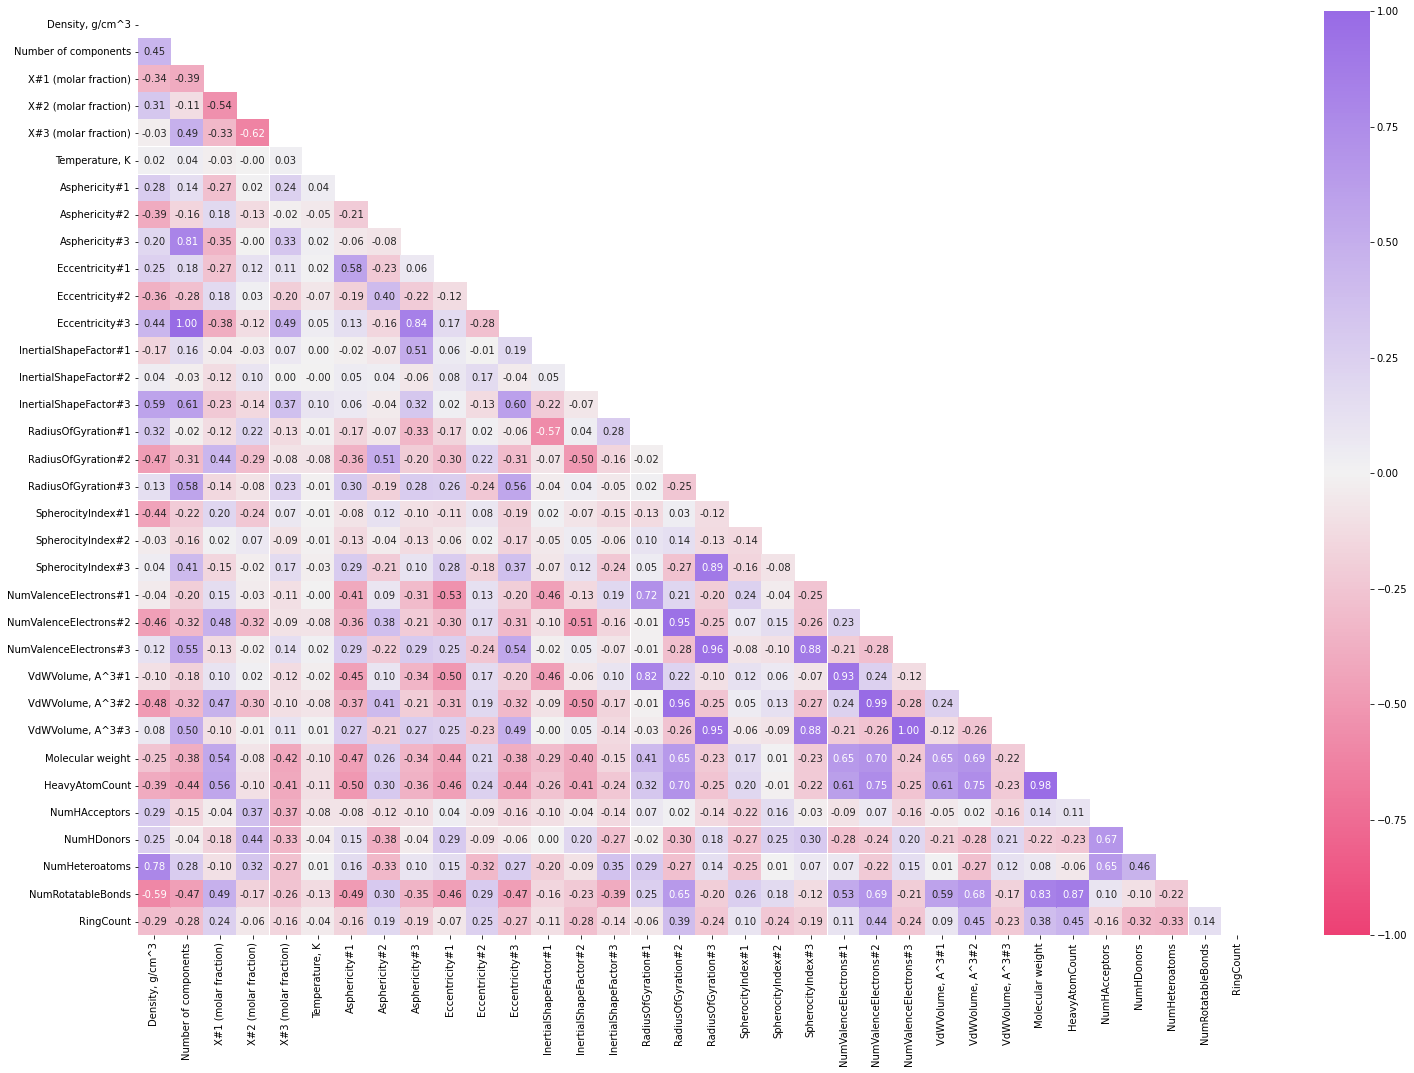

In [ ]:
# Корреляции и тепловая диаграмма
mask = np.triu(np.ones_like(new_density_df.corr(), dtype=bool)) #создаем маску для выделения верхнего треугольника массива
cmap = sns.diverging_palette(0, 277, s=80, l=55, n=9, as_cmap=True) #создание палитры для корреляционного графика
plt.figure(figsize=(25, 17)) #создание графика и определение его размеров
plot = sns.heatmap(new_density_df.corr(), annot=True, fmt=".2f", mask=mask, vmin=-1, vmax=1, center= 0, cmap=cmap, linewidth=0.0005) 
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта
plt.savefig('corr.png')

In [ ]:
ind_comp_df.columns

Index(['Compound', 'Compound.1', 'CanonicalSMILES', 'IsomericSMILES', 'isomer',
       'Univers_name', 'Molecular weight', 'Asphericity', 'Eccentricity',
       'InertialShapeFactor', 'RadiusOfGyration', 'SpherocityIndex',
       'fr_Al_COO', 'fr_Al_OH', 'fr_Ar_COO', 'fr_Ar_N', 'fr_Ar_NH', 'fr_Ar_OH',
       'fr_COO', 'fr_COO2', 'fr_C_O', 'fr_C_O_noCOO', 'fr_HOCCN', 'fr_Imine',
       'fr_NH0', 'fr_NH1', 'fr_NH2', 'fr_N_O', 'fr_Ndealkylation1',
       'fr_Ndealkylation2', 'fr_Nhpyrrole', 'fr_alkyl_halide',
       'fr_allylic_oxid', 'fr_amide', 'fr_aniline', 'fr_benzene',
       'fr_bicyclic', 'fr_ester', 'fr_ether', 'fr_furan', 'fr_guanido',
       'fr_halogen', 'fr_imidazole', 'fr_imide', 'fr_ketone',
       'fr_ketone_Topliss', 'fr_methoxy', 'fr_morpholine', 'fr_nitrile',
       'fr_nitro', 'fr_nitro_arom', 'fr_para_hydroxylation', 'fr_phenol',
       'fr_phenol_noOrthoHbond', 'fr_piperdine', 'fr_piperzine', 'fr_priamide',
       'fr_quatN', 'fr_tetrazole', 'fr_thiocyan', 'fr_urea',


In [ ]:
Descr_list = [x for x in ind_comp_df.columns if re.search(r'fr_', x) is not None]
for fr in Descr_list:
  sum_col = ind_comp_df[fr].sum()
  if sum_col == 0:
    ind_comp_df = ind_comp_df.drop(fr, axis = 1) 

ind_comp_df


,Compound,Compound.1,CanonicalSMILES,IsomericSMILES,isomer,Univers_name,Molecular weight,Asphericity,Eccentricity,InertialShapeFactor,...,fr_thiocyan,fr_urea,NumValenceElectrons,HeavyAtomCount,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,RingCount,"VdWVolume, A^3"
IsomericSMILES,,,,,,,,,,,,,,,,,,,,,
Cl[Zn]Cl,Zinc chloride,Zinc chloride,Cl[Zn]Cl,Cl[Zn]Cl,False,zinc chloride,136.296,0.758268,0.986352,0.072604,...,0,0,16,3,0,0,3,0,0,69.710435
CCCCN1C=C[N+](=C1)C.[Cl-],1-Butyl-3-methyl imidazolium chloride,1-Butyl-3-methyl imidazolium chloride,CCCCN1C=C[N+](=C1)C.[Cl-],CCCCN1C=C[N+](=C1)C.[Cl-],False,1-Butyl-3-methylimidazolium chloride,174.675,0.219765,0.993893,0.001322,...,0,0,64,11,1,0,3,5,1,161.773246
CCN1C=C[N+](=C1)C.[Cl-],1-Ethyl-3-methylimidazolium chloride,1-Ethyl-3-methylimidazolium chloride,CCN1C=C[N+](=C1)C.[Cl-],CCN1C=C[N+](=C1)C.[Cl-],False,1-Ethyl-3-methylimidazolium chloride,146.621,0.510592,0.993516,0.002134,...,0,0,52,9,1,0,3,3,1,127.541276
C1=NC=NN1,"1,2,4-Triazole","1,2,4-Triazole",C1=NC=NN1,C1=NC=NN1,False,"1H-1,2,4-Triazole",69.067,0.248222,0.880018,0.010950,...,0,0,26,5,2,1,3,0,1,51.805595
C1=CC2=NNN=C2C=C1,1H-Benzotriazole,1H-Benzotriazole,C1=CC2=NNN=C2C=C1,C1=CC2=NNN=C2C=C1,False,1H-Benzotriazole,119.127,0.385630,0.959394,0.006089,...,0,0,44,9,2,1,3,0,2,98.020159
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
[Cl-].[Cl-].[Zn+2],ZnCl2,ZnCl2,[Cl-].[Cl-].[Zn+2],[Cl-].[Cl-].[Zn+2],False,zincchloride,136.296,0.696947,0.979792,0.004443,...,0,0,16,3,0,0,3,0,0,69.710435
C(CCN)C[C@@H](C(=O)O)N,L-Lysine,L-Lysine,C(CCN)CC(C(=O)O)N,C(CCN)C[C@@H](C(=O)O)N,True,L-lysine,146.190,0.319528,0.953809,0.003274,...,0,0,60,10,4,3,4,7,0,146.804002
C([C@@H](C(=O)O)N)SSC[C@@H](C(=O)O)N,L-Cystine,L-Cystine,C(C(C(=O)O)N)SSCC(C(=O)O)N,C([C@@H](C(=O)O)N)SSC[C@@H](C(=O)O)N,True,L-cystine,240.306,0.334933,0.987619,0.001394,...,0,0,82,14,8,4,8,9,0,200.422654


In [ ]:
# Добавление структурных дескрипторов в основную таблицу
Descr_list =  [x for x in ind_comp_df.columns if re.search(r'fr_', x) is not None]
for desc in Descr_list:
  f_get_desc = lambda x: ind_comp_df.loc[x][desc] if isinstance(x, str) else 0
  for num_comp in range(3):
    name_new_column = desc + '#' + str(num_comp + 1)
    name_old_column = 'isomer_smiles' + '#' + str(num_comp + 1)
    density_df_oversamp[name_new_column] = density_df_oversamp[name_old_column].apply(f_get_desc)


In [ ]:
# Посчитаем среднее по дескрипторам
density_df_oversamp['X#3 (molar fraction)'] = density_df_oversamp['X#3 (molar fraction)'].replace(np.nan, 0)
Desc_list_new = [x for x in ind_comp_df.columns if re.search(r'fr_', x) is not None]
for desc in Desc_list_new:
  density_df_oversamp[desc] = density_df_oversamp[desc + '#' + '1'] * density_df_oversamp['X#1 (molar fraction)'] + density_df_oversamp[desc + '#' + '2'] * density_df_oversamp['X#2 (molar fraction)'] + density_df_oversamp[desc + '#' + '3'] * density_df_oversamp['X#3 (molar fraction)']

density_df_oversamp

,Unnamed: 0,Unnamed: 0.1,Type of DES,I,II,III,IV,V,Component#1,Component#2,...,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_quatN,fr_tetrazole,fr_thiocyan,fr_urea
0,0,0,Ⅰ,1,0,0,0,0,zinc chloride,1-Butyl-3-methylimidazolium chloride,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000
1,1,1,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,"1H-1,2,4-Triazole",...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000
2,2,2,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,1H-Benzotriazole,...,1.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000
3,3,3,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,1H-Tetrazole,...,0.0,0.0,0.0,0.0,0.0,0.000,0.000,0.5,0.0,0.000
4,4,4,Ⅲ,0,0,1,0,0,1-Ethyl-3-methylimidazolium chloride,BENZIMIDAZOLE,...,1.0,0.0,0.0,0.0,0.0,0.000,0.000,0.0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,3201,3207,NaN,0,0,0,1,0,Gadolinium trinitrate,urea,...,0.0,0.0,0.0,0.0,0.0,1.666,0.000,0.0,0.0,0.833
7264,3171,3177,NaN,0,0,0,1,0,Cerium nitrate,urea,...,0.0,0.0,0.0,0.0,0.0,1.750,0.000,0.0,0.0,0.875
7265,3196,3202,NaN,0,0,0,1,0,Gadolinium trinitrate,urea,...,0.0,0.0,0.0,0.0,0.0,1.666,0.000,0.0,0.0,0.833
7266,3017,3023,NaN,0,0,1,0,1,CHOLINE CHLORIDE,imidazole,...,0.0,0.0,0.0,0.0,0.0,0.000,0.125,0.0,0.0,0.000


In [ ]:
# Выделяем необходимые столбики
List2 =  [x for x in ind_comp_df.columns if re.search(r'fr_', x) is not None]
List1 = ['Density, g/cm^3', 'Number of components', 'Type of DES', 'Component#1', 'Component#2',
       'Component#3', 'X#1 (molar fraction)', 'X#2 (molar fraction)',
       'X#3 (molar fraction)', 'Temperature, K','isomer_smiles#1', 'isomer_smiles#2',
       'isomer_smiles#3']
Desc_list_heatmap = List1 + List2 
Desc_list_heatmap
new_density_df_str = density_df_oversamp[Desc_list_heatmap]
new_density_df_str.head(2)

,"Density, g/cm^3",Number of components,Type of DES,Component#1,Component#2,Component#3,X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),"Temperature, K",...,fr_para_hydroxylation,fr_phenol,fr_phenol_noOrthoHbond,fr_piperdine,fr_piperzine,fr_priamide,fr_quatN,fr_tetrazole,fr_thiocyan,fr_urea
0,1.10250,2,Ⅰ,zinc chloride,1-Butyl-3-methylimidazolium chloride,NaN,0.5,0.5,0.0,300.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.16822,2,Ⅲ,1-Ethyl-3-methylimidazolium chloride,"1H-1,2,4-Triazole",NaN,0.5,0.5,0.0,313.2,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


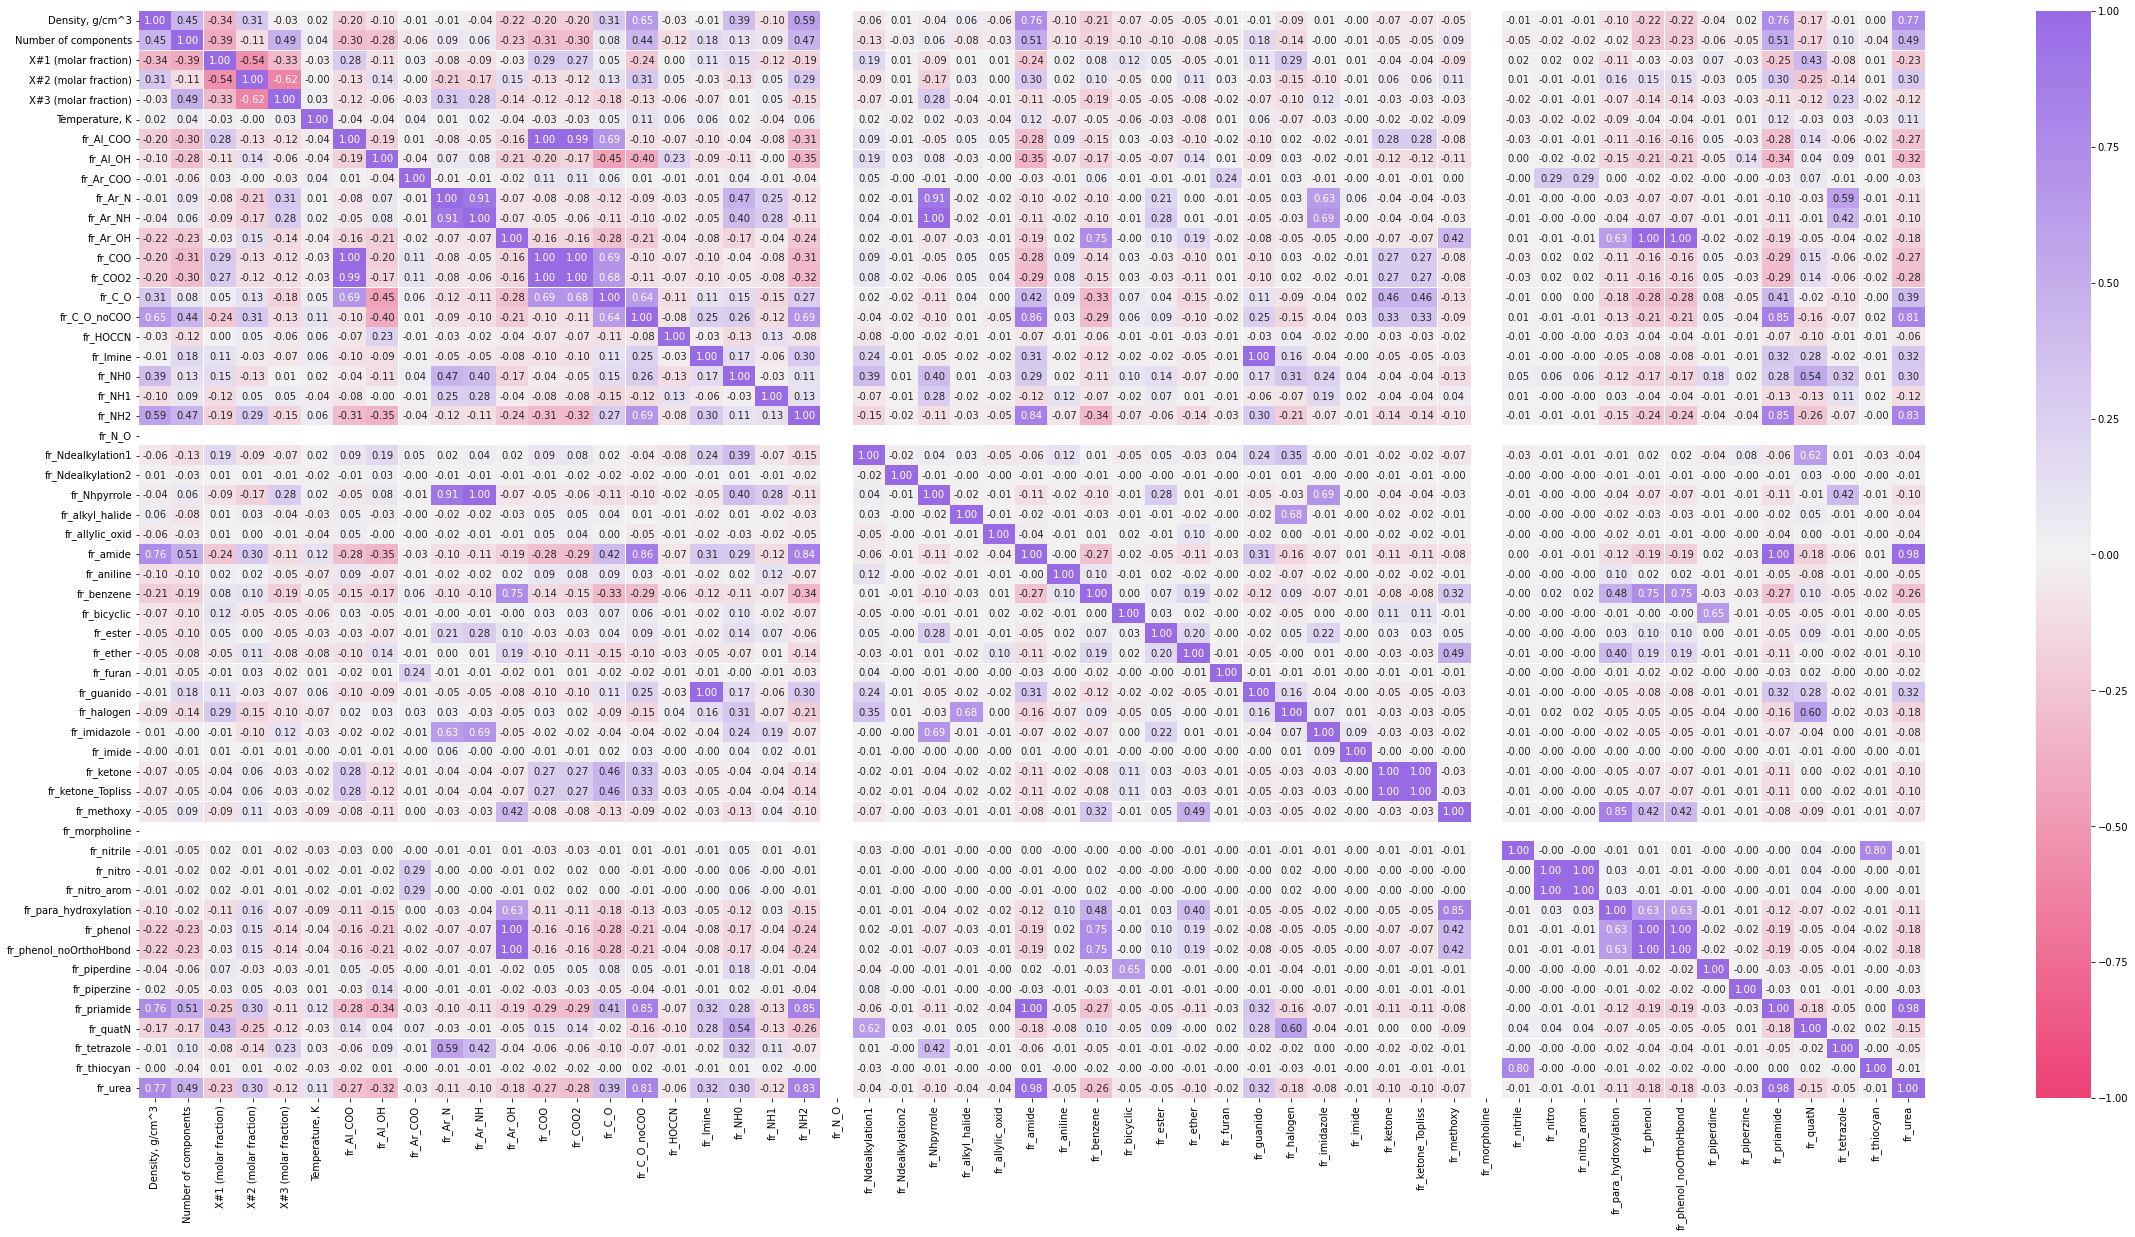

In [ ]:
# Корреляции и тепловая диаграмма
#mask = np.triu(np.ones_like(new_density_df_str.corr(), dtype=bool)) #создаем маску для выделения верхнего треугольника массива
cmap = sns.diverging_palette(0, 277, s=80, l=55, n=9, as_cmap=True) #создание палитры для корреляционного графика
plt.figure(figsize=(40, 20)) #создание графика и определение его размеров
plot = sns.heatmap(new_density_df_str.corr(), annot=True, fmt=".2f", vmin=-1, vmax=1, center= 0, cmap=cmap, linewidth=0.0005) 
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта
plt.savefig('corr.png')

In [ ]:
density_df_MO = density_df_oversamp[['Component#1', 'Component#2', 'Component#3', 'X#1 (molar fraction)', 'X#2 (molar fraction)', 'X#3 (molar fraction)', 
                                     'Temperature, K', 'Density, g/cm^3','Reference (DOI)','isomer_smiles#1','isomer_smiles#2','isomer_smiles#3',
                                     'Asphericity#1','Asphericity#2','Asphericity#3','Eccentricity#1','Eccentricity#2','Eccentricity#3',
                                     'InertialShapeFactor#1','InertialShapeFactor#2','InertialShapeFactor#3',
                                     'SpherocityIndex#1','SpherocityIndex#2','SpherocityIndex#3','VdWVolume, A^3#1','VdWVolume, A^3#2','VdWVolume, A^3#3',
                                     'NumHeteroatoms','RingCount','fr_Al_COO','fr_Al_OH','fr_Ar_COO','fr_Ar_N','fr_Ar_OH',
                                     'fr_aniline','fr_halogen', 'fr_urea']]
density_df_MO

,Component#1,Component#2,Component#3,X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),"Temperature, K","Density, g/cm^3",Reference (DOI),isomer_smiles#1,...,NumHeteroatoms,RingCount,fr_Al_COO,fr_Al_OH,fr_Ar_COO,fr_Ar_N,fr_Ar_OH,fr_aniline,fr_halogen,fr_urea
0,zinc chloride,1-Butyl-3-methylimidazolium chloride,NaN,0.500,0.500,0.000,300.20,1.10250,10.1016/j.cclet.2013.09.004,Cl[Zn]Cl,...,3.000,0.500,0.0,0.000,0.0,1.000,0.0,0.0,1.500,0.000
1,1-Ethyl-3-methylimidazolium chloride,"1H-1,2,4-Triazole",NaN,0.500,0.500,0.000,313.20,1.16822,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,3.000,1.000,0.0,0.000,0.0,2.500,0.0,0.0,0.500,0.000
2,1-Ethyl-3-methylimidazolium chloride,1H-Benzotriazole,NaN,0.500,0.500,0.000,313.20,1.46660,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,3.000,1.500,0.0,0.000,0.0,2.500,0.0,0.0,0.500,0.000
3,1-Ethyl-3-methylimidazolium chloride,1H-Tetrazole,NaN,0.500,0.500,0.000,313.20,1.16062,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,3.500,1.000,0.0,0.000,0.0,3.000,0.0,0.0,0.500,0.000
4,1-Ethyl-3-methylimidazolium chloride,BENZIMIDAZOLE,NaN,0.500,0.500,0.000,313.20,1.19850,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,2.500,1.500,0.0,0.000,0.0,2.000,0.0,0.0,0.500,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,Gadolinium trinitrate,urea,water,0.127,0.833,0.040,343.15,1.70700,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,...,4.190,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.833
7264,Cerium nitrate,urea,water,0.094,0.875,0.031,313.15,1.61300,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,...,3.878,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.875
7265,Gadolinium trinitrate,urea,water,0.127,0.833,0.040,298.15,1.75200,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,...,4.190,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.833
7266,CHOLINE CHLORIDE,imidazole,ETHYLENE GLYCOL,0.125,0.292,0.583,333.20,1.08960,10.1021/acssuschemeng.9b02845,C[N+](C)(C)CCO.[Cl-],...,2.125,0.292,0.0,1.291,0.0,0.584,0.0,0.0,0.125,0.000


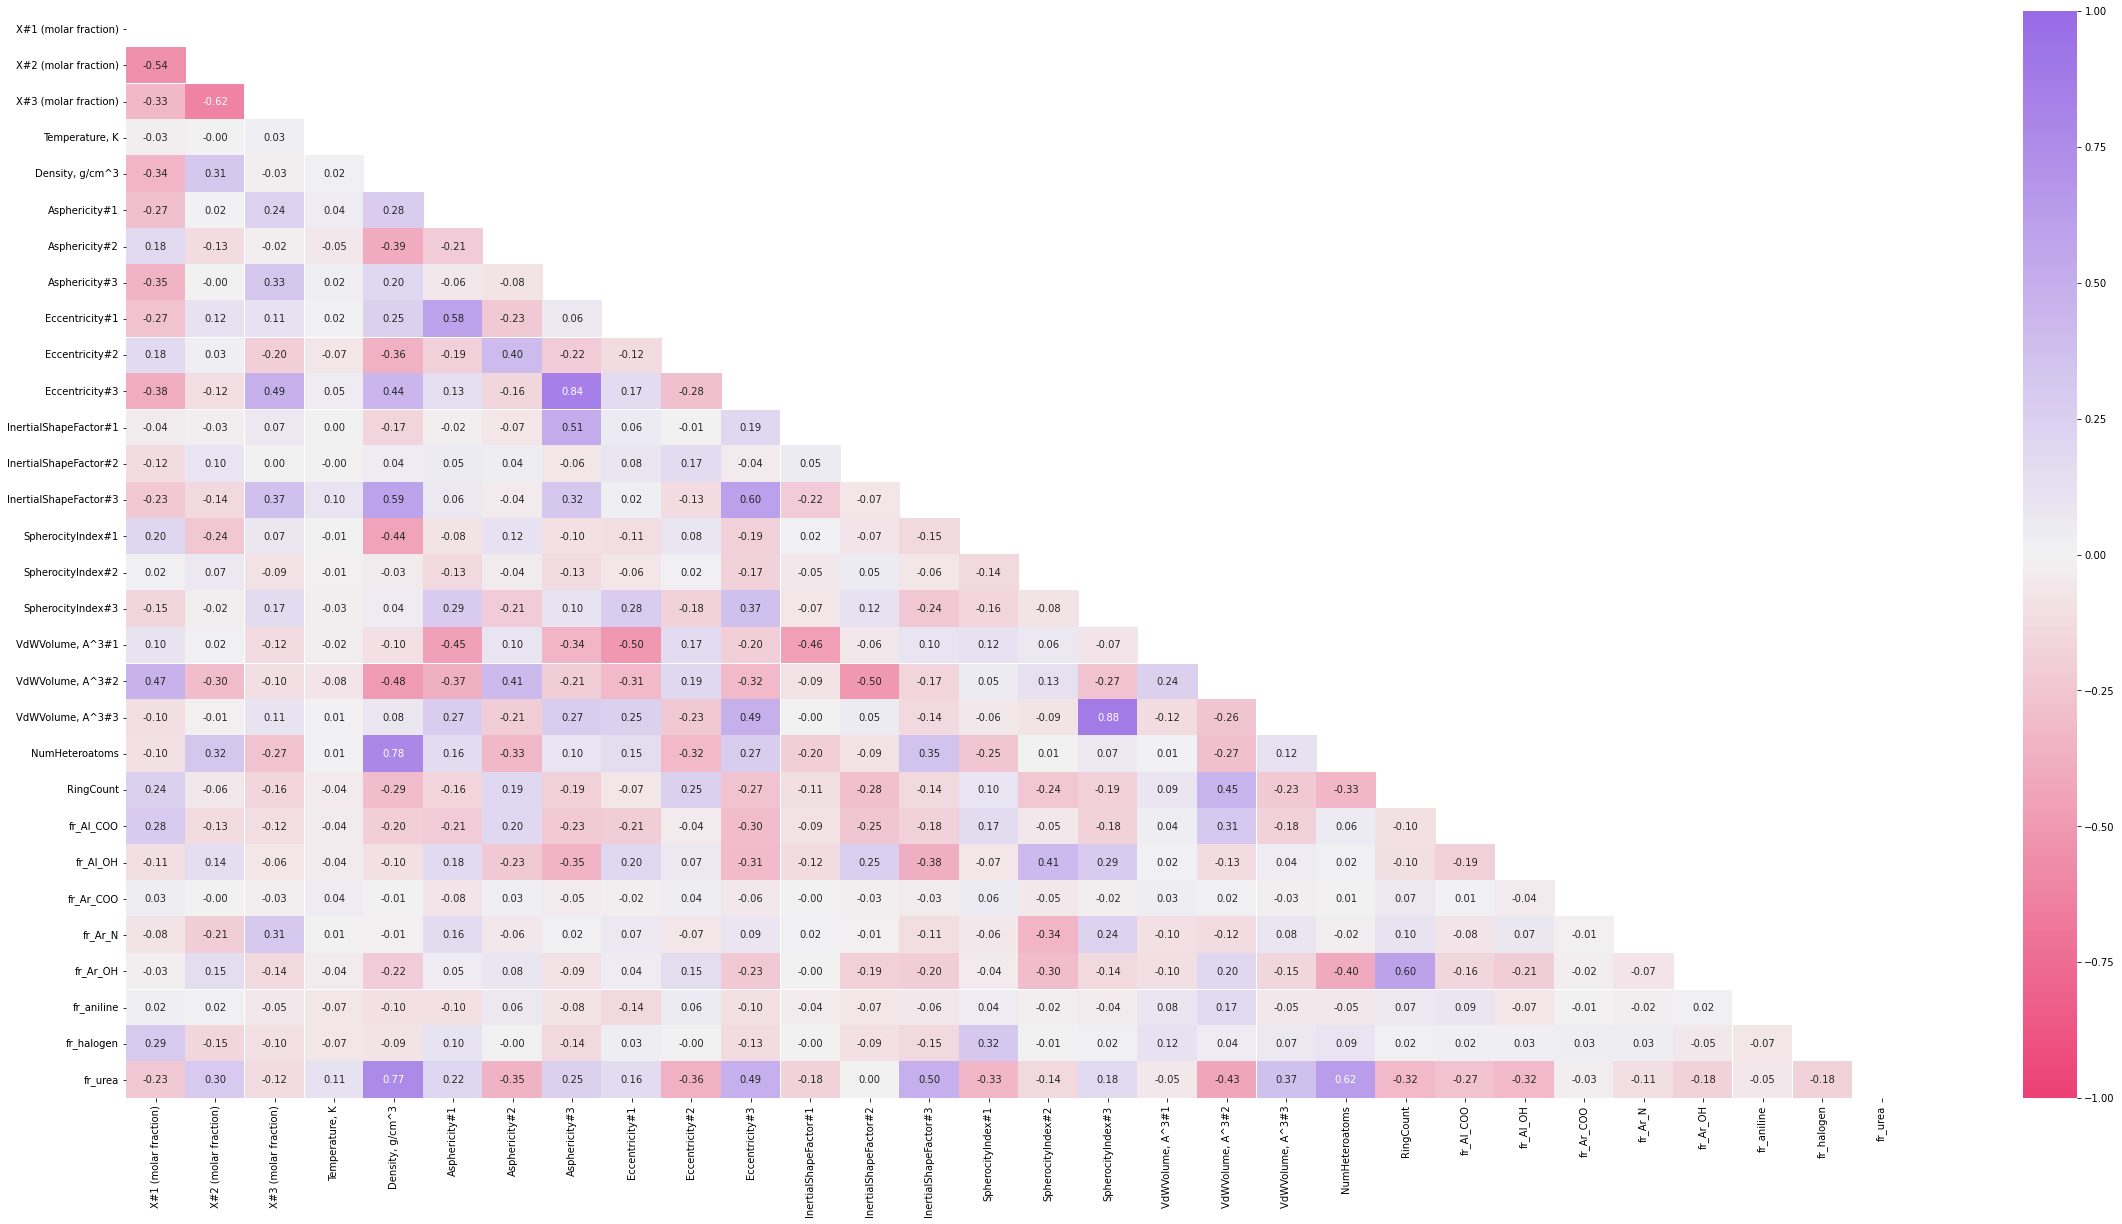

In [ ]:
# Корреляции и тепловая диаграмма
mask = np.triu(np.ones_like(density_df_MO.corr(), dtype=bool)) #создаем маску для выделения верхнего треугольника массива
cmap = sns.diverging_palette(0, 277, s=80, l=55, n=9, as_cmap=True) #создание палитры для корреляционного графика
plt.figure(figsize=(40, 20)) #создание графика и определение его размеров
plot = sns.heatmap(density_df_MO.corr(), annot=True, fmt=".2f", mask = mask, vmin=-1, vmax=1, center= 0, cmap=cmap, linewidth=0.0005) 
#annot=True - вывод коэффициентов корреляции, fmt - число знаков после запятой, v - пределы, cmap - палитра, linewidth - толщина шрифта
plt.savefig('corr.png')

In [ ]:
#Таблица с номерами по компонентам
density_df_MO['Component#3'] = density_df_MO['Component#3'].replace(np.nan, 0)
df_comp_ind = density_df_MO[['Component#1', 'Component#2', 'Component#3', 'Density, g/cm^3']]
df_comp_ind = df_comp_ind[['Component#1', 'Component#2', 'Component#3', 'Density, g/cm^3']].groupby(['Component#1', 'Component#2', 'Component#3']).agg('count')
df_comp_ind.reset_index(level = [0, 1, 2], inplace = True)
df_comp_ind


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Component#1,Component#2,Component#3,"Density, g/cm^3"
0,(+)-L-Tartaric acid,D-Glc,0,1
1,"1,3-diaminopropane",ETHYLENE GLYCOL,0,114
2,1-Butyl-3-methylimidazolium chloride,ETHYLENE GLYCOL,0,2
3,1-Butyl-3-methylimidazolium chloride,zincchloride,0,2
4,1-ETHYL-1-METHYLPYRROLIDINIUM BROMIDE,"1,6-HEXANEDIOL",0,5
...,...,...,...,...
400,zinc chloride,1-Butyl-3-methylimidazolium chloride,0,1
401,zinc chloride,1-Butyl-3-methylimidazolium chloride,acetamide,18
402,zinc chloride,ETHYLENE GLYCOL,0,1
403,zinc chloride,acetamide,0,1


In [ ]:
# Добавим в датафрейм столбик с индексом сисетмы
density_df_MO['ind_syst'] = 0
for i in density_df_MO.index:
  for j in df_comp_ind.index:
    if (density_df_MO.loc[i, 'Component#1'] == df_comp_ind.loc[j,'Component#1']) & (density_df_MO.loc[i,'Component#2'] == df_comp_ind.loc[j,'Component#2']) & (density_df_MO.loc[i,'Component#3'] == df_comp_ind.loc[j,'Component#3']):
      density_df_MO.loc[i,'ind_syst'] = j

density_df_MO



A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,Component#1,Component#2,Component#3,X#1 (molar fraction),X#2 (molar fraction),X#3 (molar fraction),"Temperature, K","Density, g/cm^3",Reference (DOI),isomer_smiles#1,...,RingCount,fr_Al_COO,fr_Al_OH,fr_Ar_COO,fr_Ar_N,fr_Ar_OH,fr_aniline,fr_halogen,fr_urea,ind_syst
0,zinc chloride,1-Butyl-3-methylimidazolium chloride,0,0.500,0.500,0.000,300.20,1.10250,10.1016/j.cclet.2013.09.004,Cl[Zn]Cl,...,0.500,0.0,0.000,0.0,1.000,0.0,0.0,1.500,0.000,400
1,1-Ethyl-3-methylimidazolium chloride,"1H-1,2,4-Triazole",0,0.500,0.500,0.000,313.20,1.16822,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,1.000,0.0,0.000,0.0,2.500,0.0,0.0,0.500,0.000,5
2,1-Ethyl-3-methylimidazolium chloride,1H-Benzotriazole,0,0.500,0.500,0.000,313.20,1.46660,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,1.500,0.0,0.000,0.0,2.500,0.0,0.0,0.500,0.000,6
3,1-Ethyl-3-methylimidazolium chloride,1H-Tetrazole,0,0.500,0.500,0.000,313.20,1.16062,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,1.000,0.0,0.000,0.0,3.000,0.0,0.0,0.500,0.000,7
4,1-Ethyl-3-methylimidazolium chloride,BENZIMIDAZOLE,0,0.500,0.500,0.000,313.20,1.19850,10.1021/acssuschemeng.0c04215,CCN1C=C[N+](=C1)C.[Cl-],...,1.500,0.0,0.000,0.0,2.000,0.0,0.0,0.500,0.000,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7263,Gadolinium trinitrate,urea,water,0.127,0.833,0.040,343.15,1.70700,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,...,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.833,130
7264,Cerium nitrate,urea,water,0.094,0.875,0.031,313.15,1.61300,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,...,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.875,100
7265,Gadolinium trinitrate,urea,water,0.127,0.833,0.040,298.15,1.75200,10.1016/j.molliq.2022.119396,[N+](=O)([O-])[O-].[N+](=O)([O-])[O-].[N+](=O)...,...,0.000,0.0,0.000,0.0,0.000,0.0,0.0,0.000,0.833,130
7266,CHOLINE CHLORIDE,imidazole,ETHYLENE GLYCOL,0.125,0.292,0.583,333.20,1.08960,10.1021/acssuschemeng.9b02845,C[N+](C)(C)CCO.[Cl-],...,0.292,0.0,1.291,0.0,0.584,0.0,0.0,0.125,0.000,80


In [ ]:
density_df_MO.to_excel('density_df_MO.xlsx')

In [ ]:
for elem in density_df_MO.columns:
  print(elem)

In [ ]:
colors = ['#41395e','#fefa9a', '#ecc2d3', '#ba8fb3', '#fffde1'] # Палетка цветов


Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


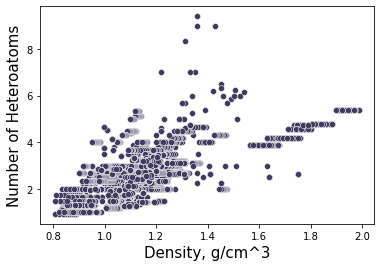

In [ ]:
ax = sns.scatterplot(density_df_MO['Density, g/cm^3'], density_df_MO['NumHeteroatoms'], color = colors[0])
ax.set_xlabel('Density, g/cm^3', fontsize = 15)
ax.set_ylabel('Number of Heteroatoms', fontsize = 15)
plt.show()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


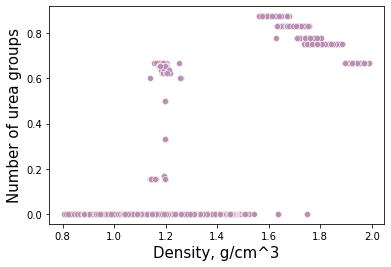

In [ ]:
ax = sns.scatterplot(density_df_MO['Density, g/cm^3'], density_df_MO['fr_urea'], color = colors[3])
ax.set_xlabel('Density, g/cm^3', fontsize = 15)
ax.set_ylabel('Number of urea groups', fontsize = 15)
plt.show()

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


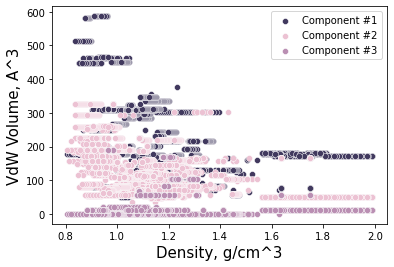

In [ ]:
ax = sns.scatterplot(density_df_MO['Density, g/cm^3'], density_df_MO['VdWVolume, A^3#1'], color = colors[0], legend='auto')
ax = sns.scatterplot(density_df_MO['Density, g/cm^3'], density_df_MO['VdWVolume, A^3#2'], color = colors[2], legend='auto')
ax = sns.scatterplot(density_df_MO['Density, g/cm^3'], density_df_MO['VdWVolume, A^3#3'], color = colors[3], legend='auto')
ax.set_xlabel('Density, g/cm^3', fontsize = 15)
ax.set_ylabel('VdW Volume, A^3', fontsize = 15)
ax.legend(['Component #1', 'Component #2', 'Component #3'])
plt.show()

## 7.Модели МО

In [ ]:
!pip install pandas
!pip install openpyxl
!pip install sklearn
!pip install matplotlib
!pip install scikit-optimize
!pip install numpy
!pip install shap
!pip install catboost
!pip install xgboost
!pip install scikit-optimize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Created wheel for sklearn: filename=sklearn-0.0.post1-py3-none-any.whl size=2344 sha256=512acd1d4b3ccd05357204e5822a02d9749edd3e94918d3ab618e415320893fe
  Stored in directory: /root/.cache/pip/wheels/42/56/cc/4a8bf86613aafd5b7f1b310477667c1fca5c51c3ae4124a003
Successfully built sklearn
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100 kB 5.5 MB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-pyth

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#from scopt import BayesSearchCV
#from scopt.space import Integer, Real, Categorical 

import shap

from sklearn import metrics

from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import model_selection
from sklearn.model_selection import GroupShuffleSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.tree import DecisionTreeRegressor
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
from sklearn.impute import KNNImputer

In [ ]:
#Переносим предсказываемую колонку в конец для удобства
db_final1 = pd.read_excel('density_df_MO.xlsx')
db_final = db_final1.drop(columns=['Density, g/cm^3'])
db_final.insert(0, 'Density, g/cm^3', db_final1['Density, g/cm^3'])

In [ ]:
df_err = pd.DataFrame()

In [ ]:
db_final = db_final.drop(['Unnamed: 0', 'Reference (DOI)', 'isomer_smiles#1', 'isomer_smiles#2', 'isomer_smiles#3'], axis = 1)
#db_final = db_final.dropna()
db_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7268 entries, 0 to 7267
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Density, g/cm^3        7268 non-null   float64
 1   Component#1            7268 non-null   object 
 2   Component#2            7268 non-null   object 
 3   Component#3            7268 non-null   object 
 4   X#1 (molar fraction)   7268 non-null   float64
 5   X#2 (molar fraction)   7268 non-null   float64
 6   X#3 (molar fraction)   7268 non-null   float64
 7   Temperature, K         7268 non-null   float64
 8   Asphericity#1          7268 non-null   float64
 9   Asphericity#2          7268 non-null   float64
 10  Asphericity#3          7268 non-null   float64
 11  Eccentricity#1         7268 non-null   float64
 12  Eccentricity#2         7268 non-null   float64
 13  Eccentricity#3         7268 non-null   float64
 14  InertialShapeFactor#1  7268 non-null   float64
 15  Iner

In [ ]:
def custom_cv(x,y,groups,n_splits,test_size):
    custom_cv = []
    kfold = GroupShuffleSplit(n_splits=n_splits, test_size=test_size, random_state=42)
    for train_idx, test_idx in kfold.split(x, y, groups):
        custom_cv.append((train_idx, test_idx))
    return custom_cv

In [ ]:
# Разбиваем выборку, так чтобы в тестовой и тренировочной были различные системы
y = db_final.loc[:,'Density, g/cm^3']
x = db_final.loc[:,'X#1 (molar fraction)':]
cv = custom_cv(x, y, db_final['ind_syst'], 1, 0.2)
for train_idx, val_idx in cv:
    x_train, x_test = x.iloc[train_idx], x.iloc[val_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[val_idx]

In [ ]:
#Введем функцию для построения графиков
def regr_plot(y_train, y_test, y_pred, y1_pred):
    f, ax = plt.subplots(figsize=(15, 10))
    plt.scatter(y_train, y1_pred, color=colors[2], s=70, label='Train')
    plt.scatter(y_test, y_pred, color=colors[3],s=70, label='Test')
    plt.plot(y_test, y_test, color=colors[0])
    plt.xlabel('Test data', fontsize=35)
    plt.ylabel('Predicted data', fontsize=35)
    plt.legend(fontsize = 30)
    plt.xlim(0.5, 3)
    plt.ylim(0.5, 3)

In [ ]:
#Введем функцию для расчета метрик
def regr_metrics(regr, x_train, y_train, y_test, y_pred, y1_pred):
    Q2 = cross_val_score(regr, x_train, y_train, cv=10).mean()
    R2 = metrics.r2_score(y_test, y_pred)
    R2_train = metrics.r2_score(y_train, y1_pred)
    MAE = metrics.mean_absolute_error(y_test, y_pred)
    RMSE = np.sqrt(metrics.mean_squared_error(y_test, y_pred))
    RMSE_train = np.sqrt(metrics.mean_squared_error(y_train, y1_pred))
    print('Q2:', Q2)
    print('r2_test:', R2)
    print('MAE_test:', MAE)
    print('MSE_test:', metrics.mean_squared_error(y_test, y_pred))
    print('RMSE_test:', RMSE)
    print('r2_train:', metrics.r2_score(y_train, y1_pred))
    print('MAE_train:', metrics.mean_absolute_error(y_train, y1_pred))
    print('MSE_train:', metrics.mean_squared_error(y_train, y1_pred))
    print('RMSE_train:', np.sqrt(metrics.mean_squared_error(y_train, y1_pred)))
    return [R2_train, R2, RMSE_train, RMSE]

In [ ]:
#Введем функцию Feature importance 
list_columns = ['X#1 (molar fraction)', 'X#2 (molar fraction)', 'X#3 (molar fraction)', 
                                     'Temperature, K', 'Density, g/cm^3',
                                     'Asphericity#1','Asphericity#2','Asphericity#3','Eccentricity#1','Eccentricity#2','Eccentricity#3',
                                     'InertialShapeFactor#1','InertialShapeFactor#2','InertialShapeFactor#3',
                                     'SpherocityIndex#1','SpherocityIndex#2','SpherocityIndex#3','VdWVolume, A^3#1','VdWVolume, A^3#2','VdWVolume, A^3#3',
                                     'NumHeteroatoms','RingCount','fr_Al_COO','fr_Al_OH','fr_Ar_COO','fr_Ar_N','fr_Ar_OH',
                                     'fr_aniline','fr_halogen', 'fr_urea']
def regr_feature(regr, x_test, list_columns):
    explainer = shap.TreeExplainer(regr)
    shap_values = explainer.shap_values(x_test)
    f, ax = plt.subplots(figsize=(15, 13))
    shap.summary_plot(shap_values, x_test, plot_type='bar', feature_names = list_columns, color='#E6E7E5', title='Feature importance')

Q2: -0.8048211475913067
r2_test: 0.5633257162914487
MAE_test: 0.06573473736916915
MSE_test: 0.010416018581351959
RMSE_test: 0.10205889760991914
r2_train: 0.9192289831095055
MAE_train: 0.048926843475464527
MSE_train: 0.004960222679225865
RMSE_train: 0.07042884834516226
Q2: -3.979172617843524
r2_test: -3.6540028963732176
MAE_test: 0.16974256935592275
MSE_test: 0.0533809582116224
RMSE_test: 0.23104319555360725
r2_train: 0.9241601877724519
MAE_train: 0.052006075567648566
MSE_train: 0.005149539814857284
RMSE_train: 0.07176029413859229
Q2: -11.169079077060594
r2_test: 0.5968931191446221
MAE_test: 0.08131087960079621
MSE_test: 0.009125376259836233
RMSE_test: 0.09552683528640647
r2_train: 0.9157701682368614
MAE_train: 0.049912254045064525
MSE_train: 0.0050916151028200796
RMSE_train: 0.07135555411332799
Q2: 0.6362360535060262
r2_test: -1.1230477364537825
MAE_test: 0.139867300804317
MSE_test: 0.2219029682055819
RMSE_test: 0.47106577906443375
r2_train: 0.9096113851562339
MAE_train: 0.039518100316

,Linear Regression1,Linear Regression2,Linear Regression3,Linear Regression4,Linear Regression5
0,0.919229,0.924160,0.915770,0.909611,0.898767
1,0.563326,-3.654003,0.596893,-1.123048,0.872591
2,0.070429,0.071760,0.071356,0.055408,0.072596
3,0.102059,0.231043,0.095527,0.471066,0.092685


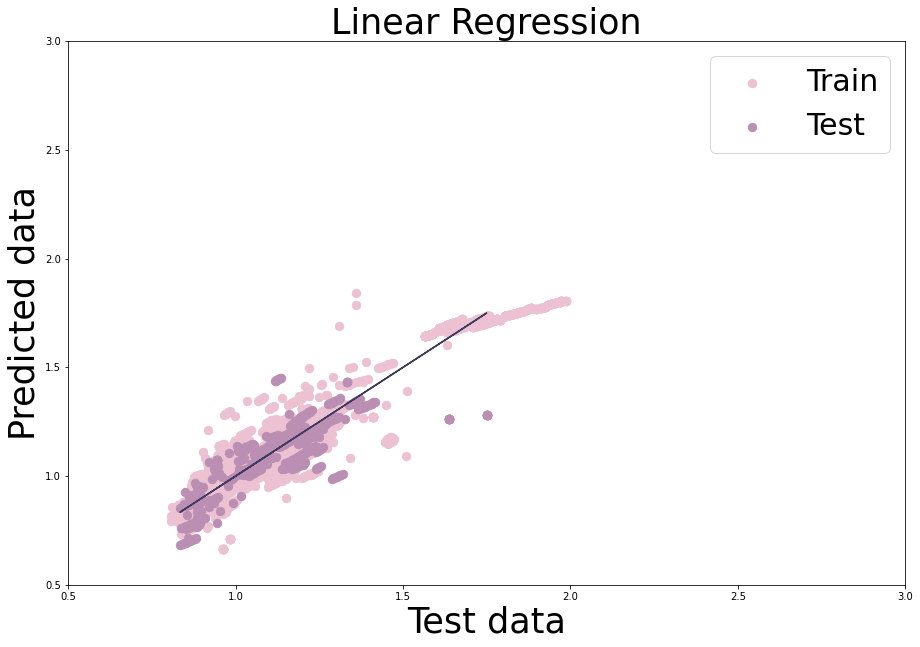

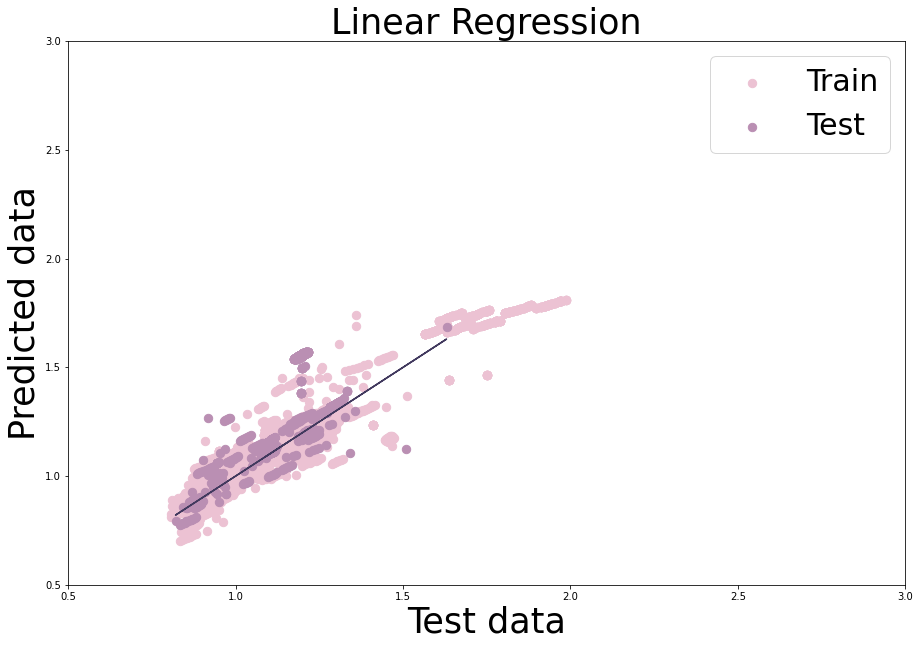

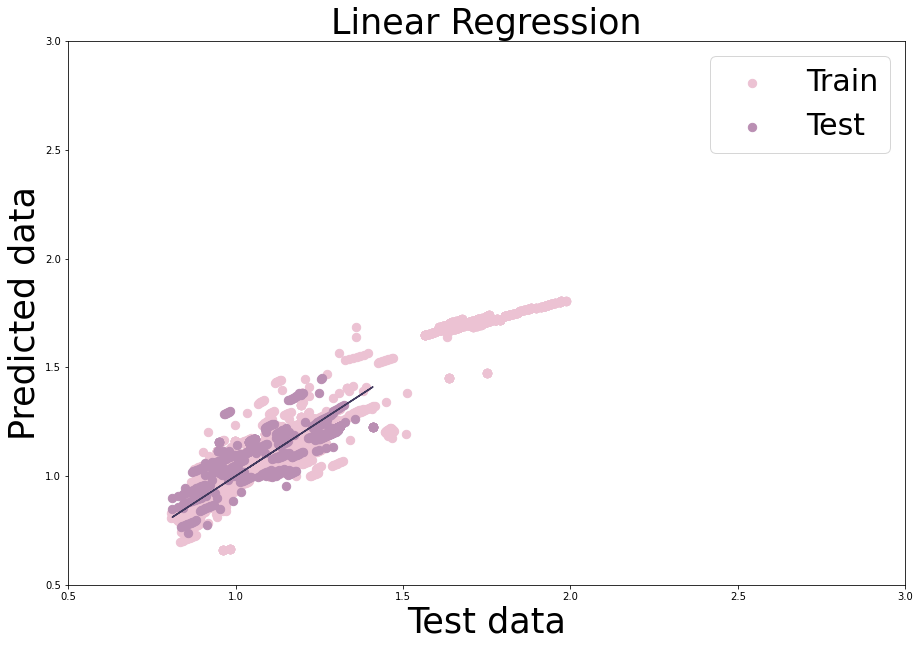

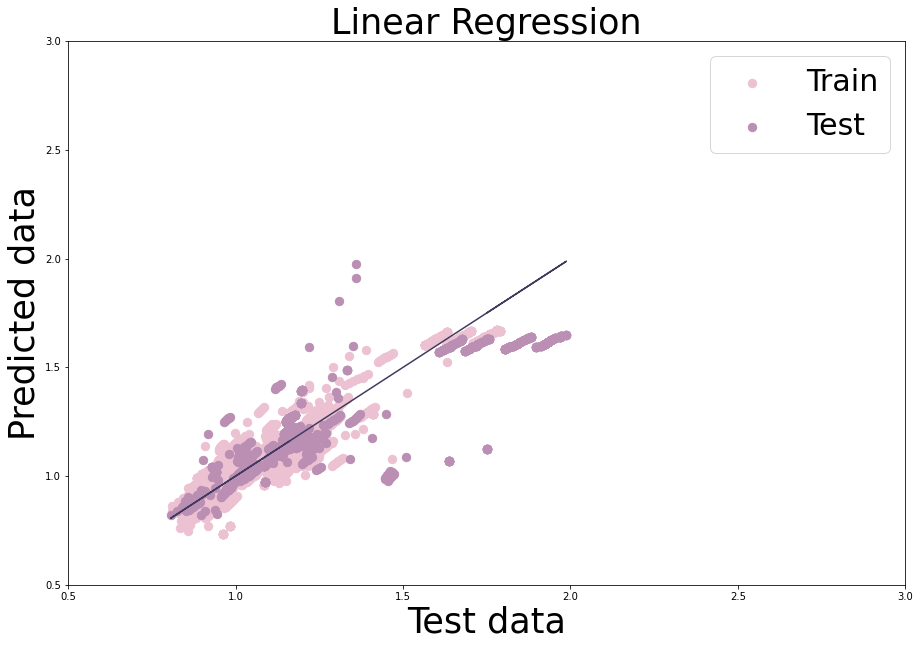

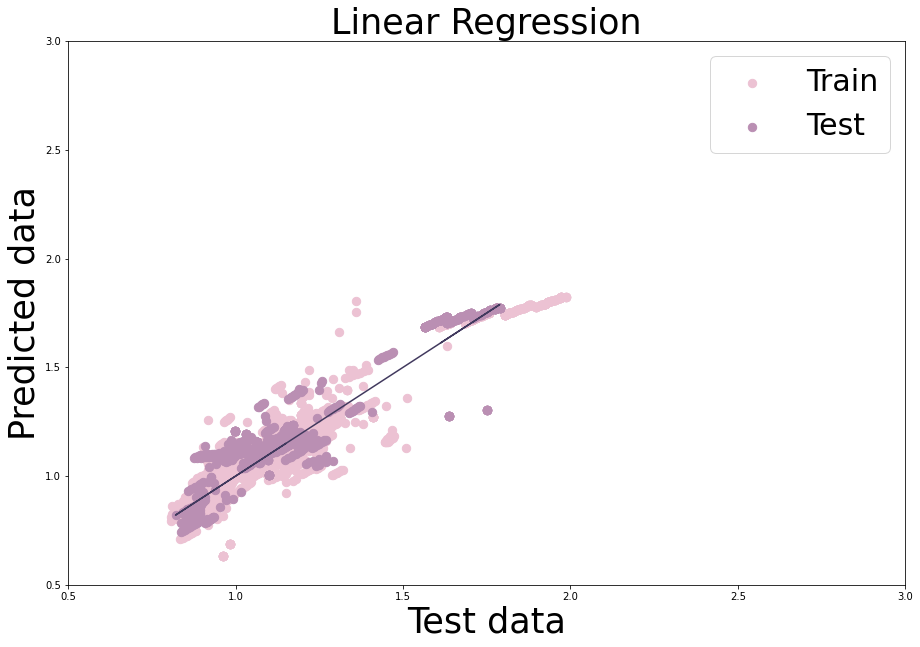

In [ ]:
#LR для тренировочного датасета
# Разбиваем выборку, так чтобы в тестовой и тренировочной были различные системы
df_error_train = pd.DataFrame()
x_model = x_train.drop(['ind_syst'],axis=1)
y_model = y_train
cv = custom_cv(x_model, y_model, x_train['ind_syst'], 5, 0.2)
count = 1
#fig, ax = plt.subplots(nrows = 5, ncols = 1)
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    #Масштабируем данные 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Линейная регрессия
    regr_LR = LinearRegression()
    regr_LR.fit(x_train_mod, y_train_mod)
    y_pred = regr_LR.predict(x_test_mod)
    y1_pred = regr_LR.predict(x_train_mod)
    #Рассчитываем метрики
    df_error_train['Linear Regression' + str(count)] = regr_metrics(regr_LR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Строим график
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Linear Regression', fontsize=35)
df_error_train






In [ ]:
#Масштабируем основные данные 
sc = MinMaxScaler(feature_range=(0, 1))
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [ ]:
#LR
regr_LR = LinearRegression(fit_intercept=True, normalize='deprecated', copy_X=True, n_jobs=-1, positive=False)
regr_LR.fit(x_train,y_train)
y_pred=regr_LR.predict(x_test)
y1_pred = regr_LR.predict(x_train)

#Рассчитываем метрики
df_err['Linear Regression'] = regr_metrics(regr_LR, x_train, y_train, y_test, y_pred, y1_pred)

#Строим график
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Linear Regression', fontsize=25)

plt.savefig('LR.png')

Q2: 0.7614898200536622
r2_test: 0.7224417089773214
MAE_test: 0.04213110065510231
MSE_test: 0.006620615008851962
RMSE_test: 0.08136716173526003
r2_train: 0.9930454828252877
MAE_train: 0.0134385505332659
MSE_train: 0.00042708331702498756
RMSE_train: 0.020665994218159154
Q2: 0.6737681830959704
r2_test: 0.7501456737432901
MAE_test: 0.0434659795986283
MSE_test: 0.0028658046945557666
RMSE_test: 0.05353321113622614
r2_train: 0.992170719899892
MAE_train: 0.01593378637787068
MSE_train: 0.0005316098288351352
RMSE_train: 0.023056665605311086
Q2: 0.7818935653497021
r2_test: 0.7543520065940963
MAE_test: 0.051754573065654993
MSE_test: 0.005560883412721668
RMSE_test: 0.0745713310376157
r2_train: 0.9925487538247181
MAE_train: 0.013876017813392096
MSE_train: 0.00045042091105658856
RMSE_train: 0.021223122085512972
Q2: 0.8031421331106475
r2_test: 0.4645958911545158
MAE_test: 0.13451126834014185
MSE_test: 0.05596094656860003
RMSE_test: 0.23656066149848337
r2_train: 0.9873638300446785
MAE_train: 0.01346320

,Linear Regression1,Linear Regression2,Linear Regression3,Linear Regression4,Linear Regression5,Gradient Boosting Regression1,Gradient Boosting Regression2,Gradient Boosting Regression3,Gradient Boosting Regression4,Gradient Boosting Regression5
0,0.919229,0.924160,0.915770,0.909611,0.898767,0.993045,0.992171,0.992549,0.987364,0.990971
1,0.563326,-3.654003,0.596893,-1.123048,0.872591,0.722442,0.750146,0.754352,0.464596,0.890043
2,0.070429,0.071760,0.071356,0.055408,0.072596,0.020666,0.023057,0.021223,0.020717,0.021681
3,0.102059,0.231043,0.095527,0.471066,0.092685,0.081367,0.053533,0.074571,0.236561,0.086103


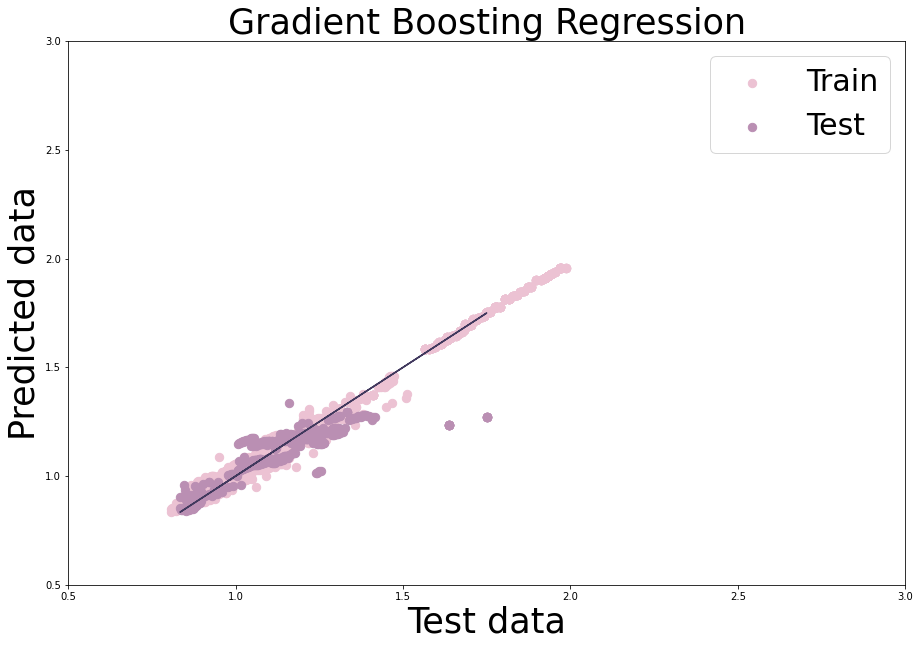

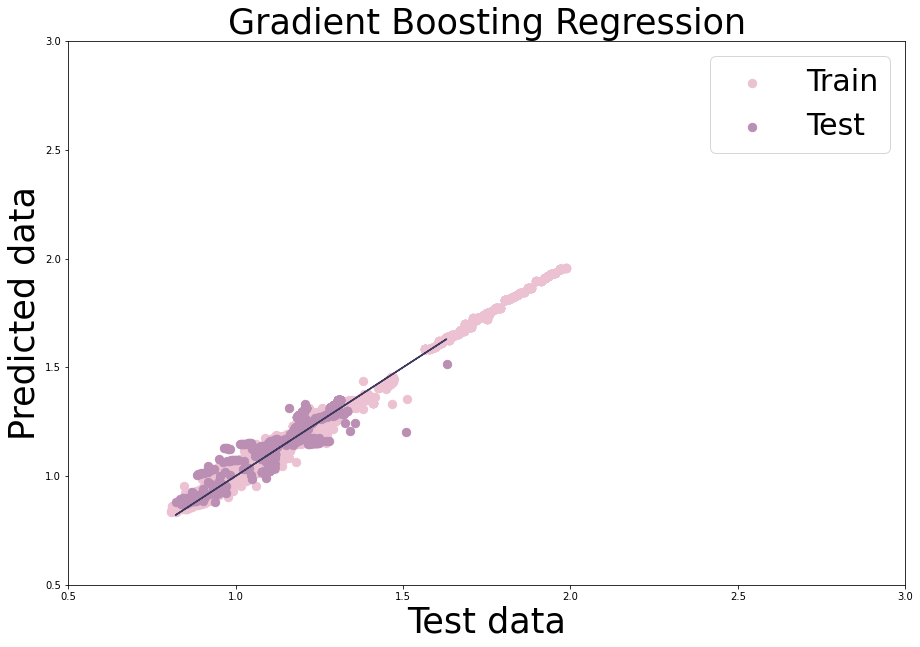

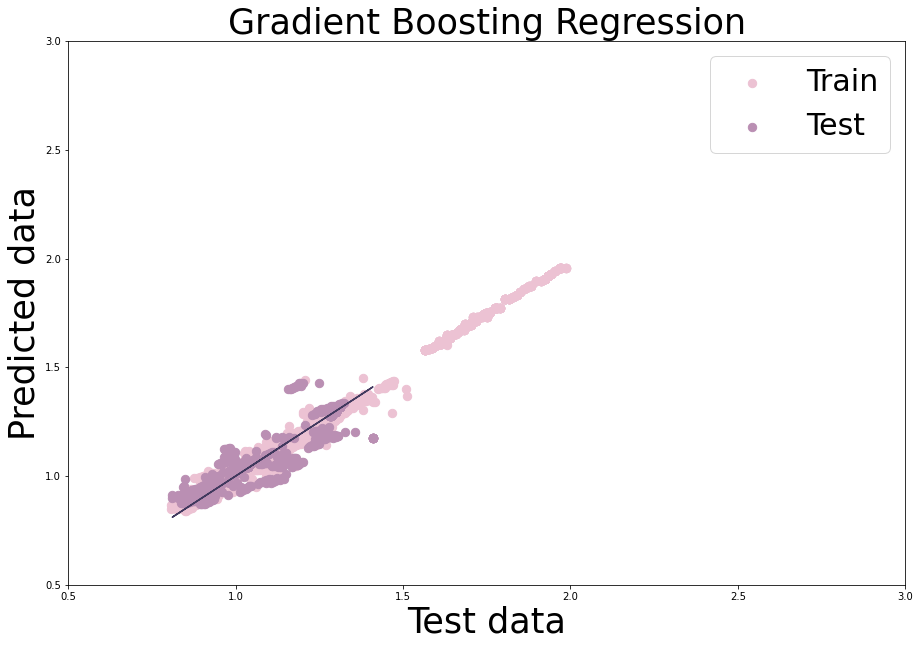

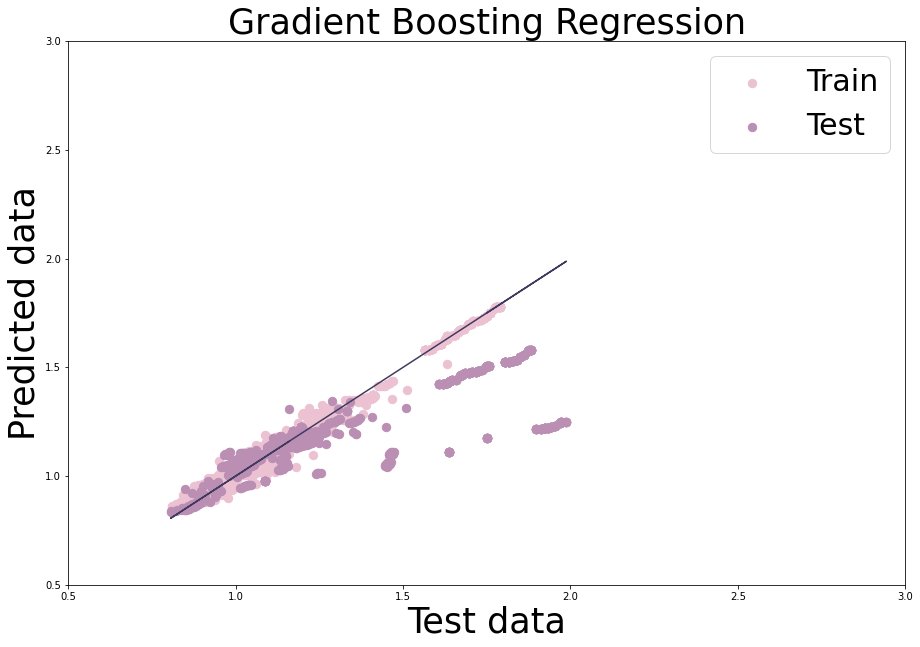

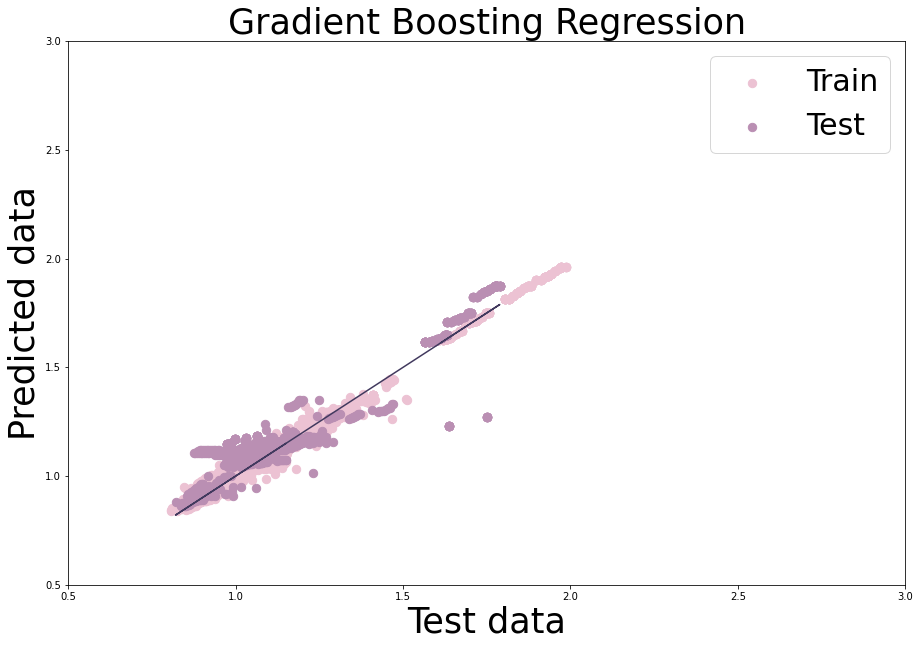

In [ ]:
count = 1
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    #Масштабируем данные 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #GBR
    regr_GBR = GradientBoostingRegressor()
    regr_GBR.fit(x_train_mod, y_train_mod)
    y_pred = regr_GBR.predict(x_test_mod)
    y1_pred = regr_GBR.predict(x_train_mod)
    #Рассчитываем метрики
    df_error_train['Gradient Boosting Regression' + str(count)] = regr_metrics(regr_GBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Строим график
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Gradient Boosting Regression', fontsize=35)
df_error_train

In [ ]:
#GBR
regr_GBR = GradientBoostingRegressor()
regr_GBR.fit(x_train, y_train)
y_pred = regr_GBR.predict(x_test)
y1_pred = regr_GBR.predict(x_train)

#Рассчитываем метрики
df_err['Gradient Boosting Regression'] = regr_metrics(regr_GBR, x_train, y_train, y_test, y_pred, y1_pred)

#Строим график
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Gradient Boosting Regressor', fontsize=25)


Выходные данные были обрезаны до нескольких последних строк (5000).
13:	learn: 0.1214401	total: 38.7ms	remaining: 2.72s
14:	learn: 0.1164605	total: 41.5ms	remaining: 2.73s
15:	learn: 0.1116509	total: 46.2ms	remaining: 2.84s
16:	learn: 0.1070916	total: 49.4ms	remaining: 2.86s
17:	learn: 0.1029773	total: 52.1ms	remaining: 2.84s
18:	learn: 0.0988722	total: 54.7ms	remaining: 2.83s
19:	learn: 0.0948610	total: 57.4ms	remaining: 2.81s
20:	learn: 0.0911350	total: 60.2ms	remaining: 2.81s
21:	learn: 0.0877240	total: 63ms	remaining: 2.8s
22:	learn: 0.0844555	total: 65.6ms	remaining: 2.79s
23:	learn: 0.0811926	total: 68.4ms	remaining: 2.78s
24:	learn: 0.0781979	total: 71.2ms	remaining: 2.78s
25:	learn: 0.0756359	total: 74ms	remaining: 2.77s
26:	learn: 0.0731753	total: 77ms	remaining: 2.77s
27:	learn: 0.0705380	total: 79.7ms	remaining: 2.77s
28:	learn: 0.0682028	total: 82.4ms	remaining: 2.76s
29:	learn: 0.0660816	total: 85ms	remaining: 2.75s
30:	learn: 0.0639746	total: 87.6ms	remaining: 2.74s
31:	l

,Linear Regression1,Linear Regression2,Linear Regression3,Linear Regression4,Linear Regression5,Gradient Boosting Regression1,Gradient Boosting Regression2,Gradient Boosting Regression3,Gradient Boosting Regression4,Gradient Boosting Regression5,Cat Boosting Regression1,Cat Boosting Regression2,Cat Boosting Regression3,Cat Boosting Regression4,Cat Boosting Regression5
0,0.919229,0.924160,0.915770,0.909611,0.898767,0.993045,0.992171,0.992549,0.987364,0.990971,0.999728,0.999795,0.999717,0.999502,0.999711
1,0.563326,-3.654003,0.596893,-1.123048,0.872591,0.722442,0.750146,0.754352,0.464596,0.890043,0.719005,0.803227,0.838922,0.485275,0.761074
2,0.070429,0.071760,0.071356,0.055408,0.072596,0.020666,0.023057,0.021223,0.020717,0.021681,0.004088,0.003731,0.004136,0.004113,0.003880
3,0.102059,0.231043,0.095527,0.471066,0.092685,0.081367,0.053533,0.074571,0.236561,0.086103,0.081869,0.047507,0.060386,0.231947,0.126923


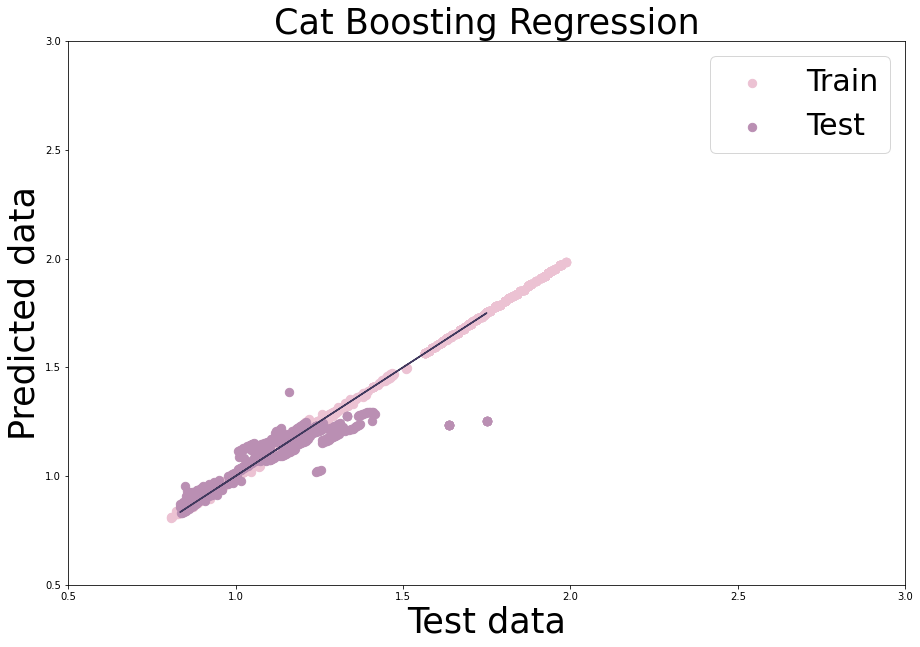

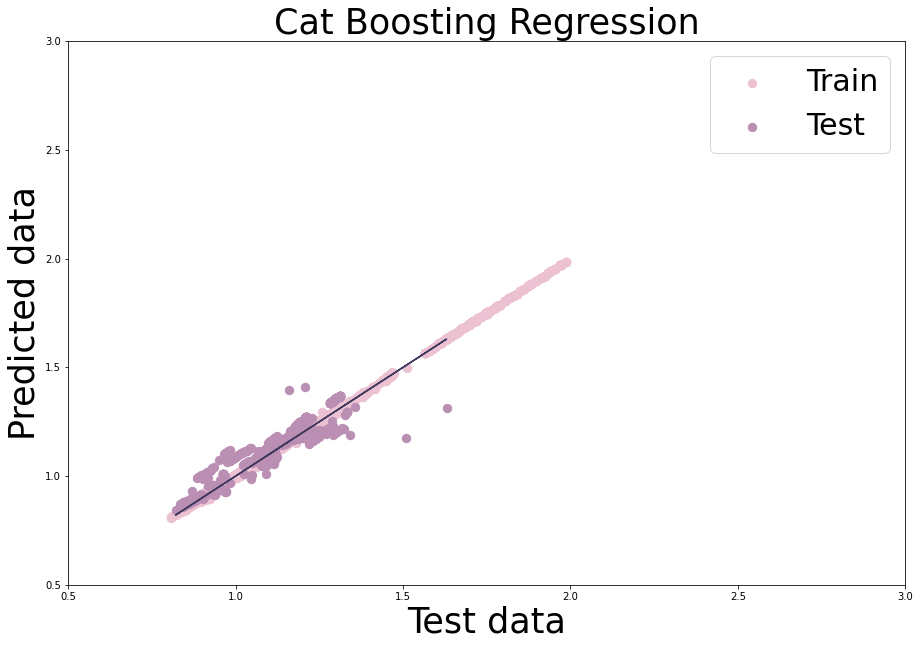

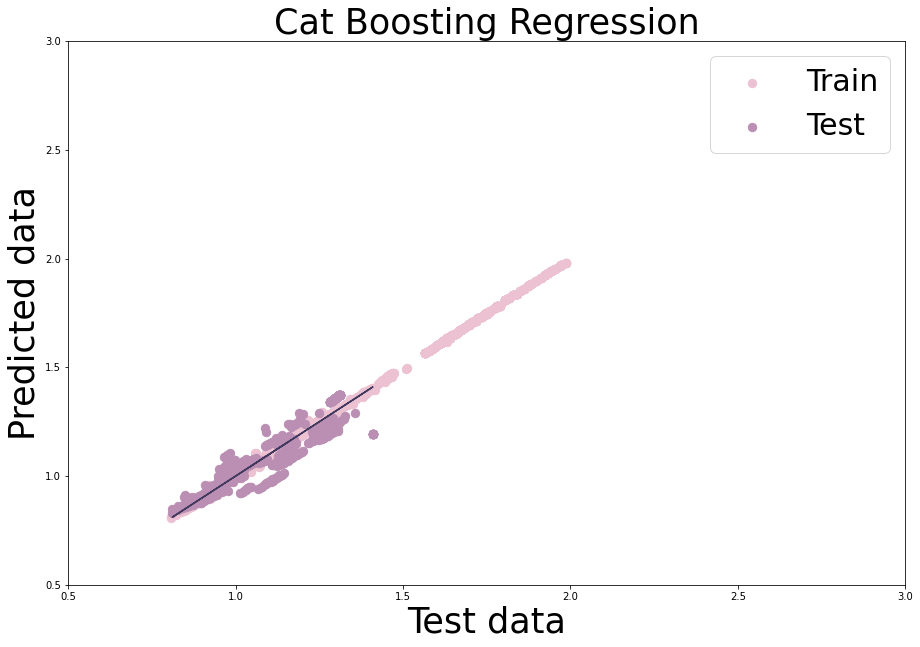

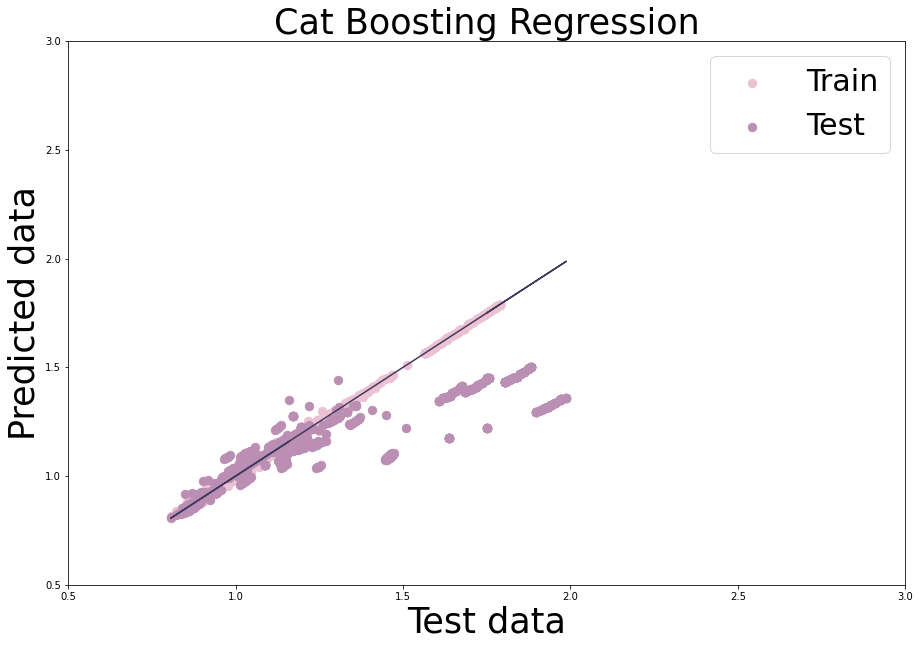

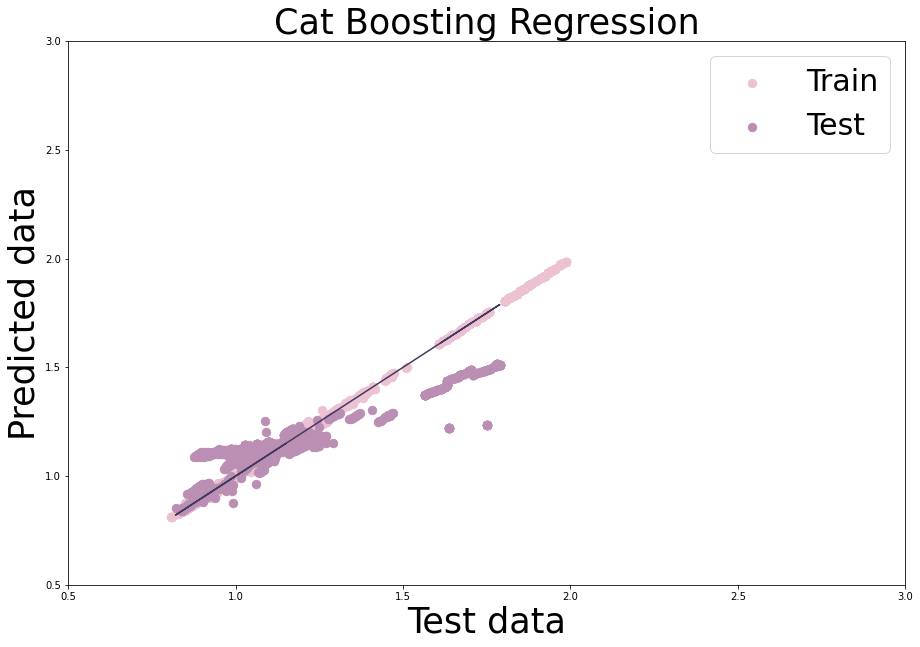

In [ ]:
count = 1
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    #Масштабируем данные 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #CBR
    regr_CBR = CatBoostRegressor()
    regr_CBR.fit(x_train_mod, y_train_mod)
    y_pred = regr_CBR.predict(x_test_mod)
    y1_pred = regr_CBR.predict(x_train_mod)
    #Рассчитываем метрики
    df_error_train['Cat Boosting Regression' + str(count)] = regr_metrics(regr_CBR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Строим график
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Cat Boosting Regression', fontsize=35)
df_error_train

In [ ]:
#CBR
regr_CBR = CatBoostRegressor()
regr_CBR.fit(x_train, y_train)
y_pred = regr_CBR.predict(x_test)
y1_pred = regr_CBR.predict(x_train)

#Рассчитываем метрики
df_err['Cat Boosting Regression'] = regr_metrics(regr_CBR, x_train, y_train, y_test, y_pred, y1_pred)

#Строим график
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Cat Boost Regressor', fontsize=25)

Q2: 0.4883876880973018
r2_test: 0.4332537410490299
MAE_test: 0.07236145780832379
MSE_test: 0.013518633417132943
RMSE_test: 0.11626965819650861
r2_train: 1.0
MAE_train: 8.79639909614193e-17
MSE_train: 3.109277241780675e-32
RMSE_train: 1.7633142776546314e-16
Q2: 0.4705377341414578
r2_test: 0.32650026843440116
MAE_test: 0.04774772626678876
MSE_test: 0.0077249760747375015
RMSE_test: 0.08789184305006638
r2_train: 1.0
MAE_train: 7.5106073190733e-17
MSE_train: 2.838499479282903e-32
RMSE_train: 1.6847846981982307e-16
Q2: 0.3770241833304623
r2_test: 0.1674230838006575
MAE_test: 0.08540270124790461
MSE_test: 0.018847551322992453
RMSE_test: 0.13728638433214144
r2_train: 1.0
MAE_train: 8.20618089534563e-17
MSE_train: 2.951015273134755e-32
RMSE_train: 1.7178519357426457e-16
Q2: 0.6107869821411461
r2_test: 0.5240525007700916
MAE_test: 0.1270030081244197
MSE_test: 0.04974648519470052
RMSE_test: 0.223039201026861
r2_train: 1.0
MAE_train: 6.636991151596879e-17
MSE_train: 1.9694492034814597e-32
RMSE_tra

,Linear Regression1,Linear Regression2,Linear Regression3,Linear Regression4,Linear Regression5,Gradient Boosting Regression1,Gradient Boosting Regression2,Gradient Boosting Regression3,Gradient Boosting Regression4,Gradient Boosting Regression5,Cat Boosting Regression1,Cat Boosting Regression2,Cat Boosting Regression3,Cat Boosting Regression4,Cat Boosting Regression5,Decision Tree Regression1,Decision Tree Regression2,Decision Tree Regression3,Decision Tree Regression4,Decision Tree Regression5
0,0.919229,0.924160,0.915770,0.909611,0.898767,0.993045,0.992171,0.992549,0.987364,0.990971,0.999728,0.999795,0.999717,0.999502,0.999711,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
1,0.563326,-3.654003,0.596893,-1.123048,0.872591,0.722442,0.750146,0.754352,0.464596,0.890043,0.719005,0.803227,0.838922,0.485275,0.761074,4.332537e-01,3.265003e-01,1.674231e-01,5.240525e-01,8.539911e-01
2,0.070429,0.071760,0.071356,0.055408,0.072596,0.020666,0.023057,0.021223,0.020717,0.021681,0.004088,0.003731,0.004136,0.004113,0.003880,1.763314e-16,1.684785e-16,1.717852e-16,1.403371e-16,1.582011e-16
3,0.102059,0.231043,0.095527,0.471066,0.092685,0.081367,0.053533,0.074571,0.236561,0.086103,0.081869,0.047507,0.060386,0.231947,0.126923,1.162697e-01,8.789184e-02,1.372864e-01,2.230392e-01,9.921955e-02


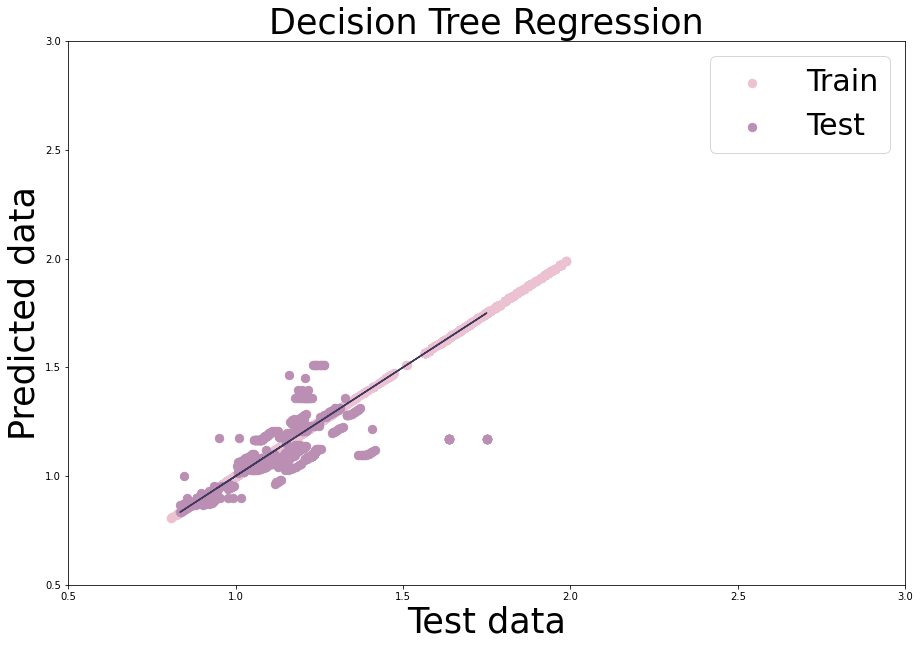

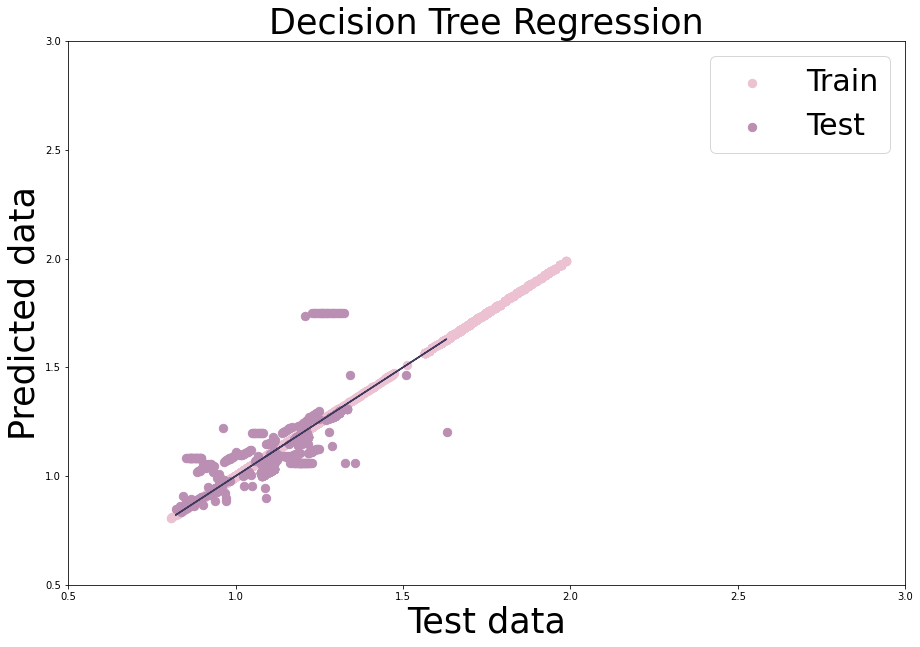

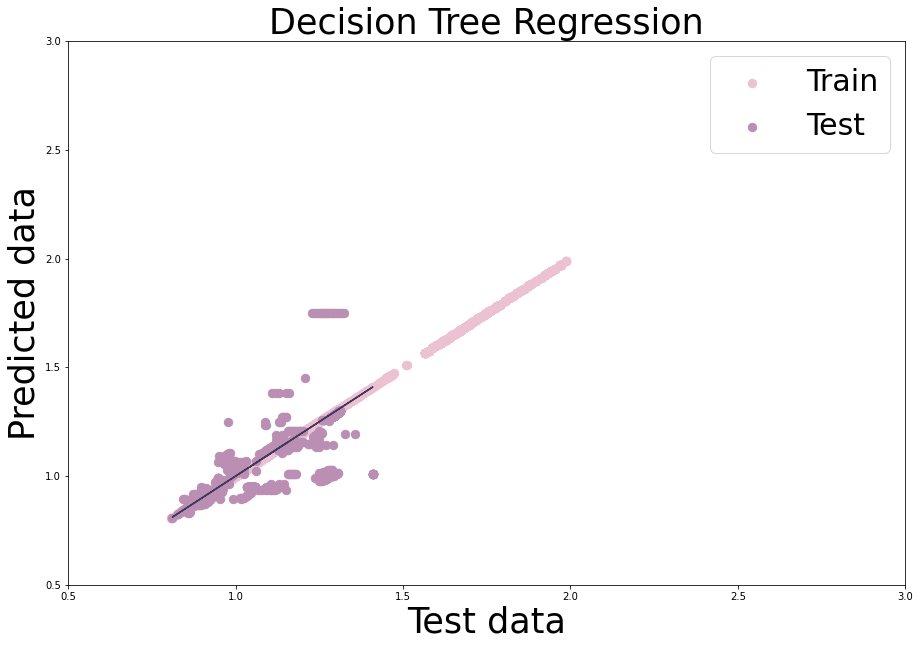

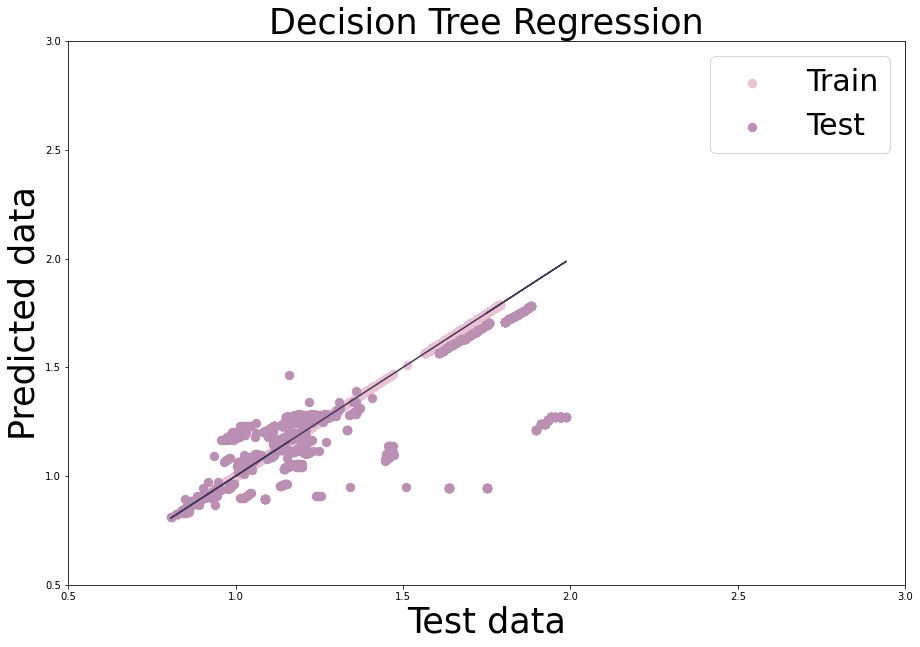

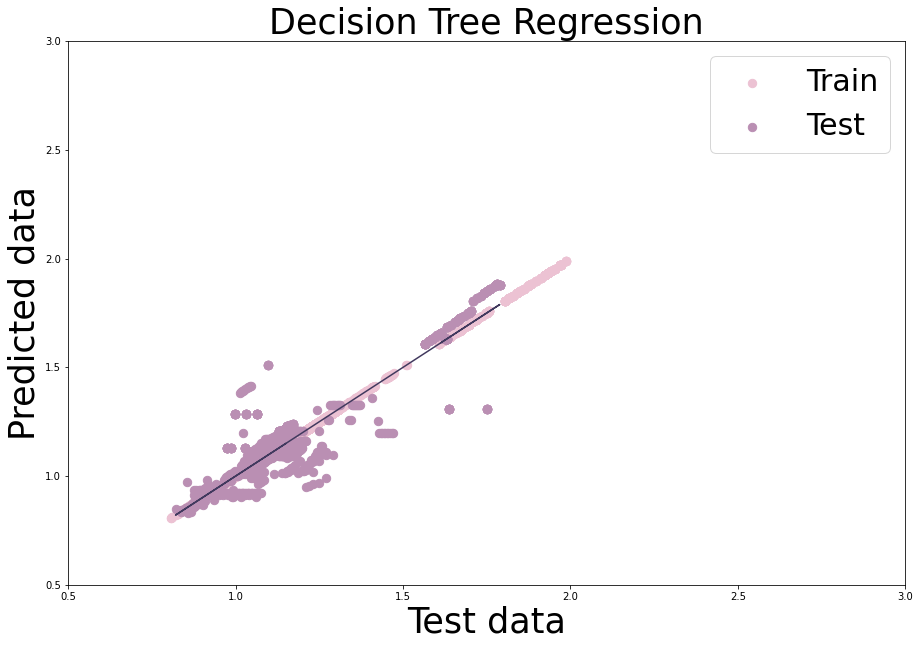

In [ ]:
count = 1
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    #Масштабируем данные 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #CBR
    regr_DTR = DecisionTreeRegressor()
    regr_DTR.fit(x_train_mod, y_train_mod)
    y_pred = regr_DTR.predict(x_test_mod)
    y1_pred = regr_DTR.predict(x_train_mod)
    #Рассчитываем метрики
    df_error_train['Decision Tree Regression' + str(count)] = regr_metrics(regr_DTR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Строим график
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Decision Tree Regression', fontsize=35)
df_error_train

In [ ]:
#DTR
regr_DTR = DecisionTreeRegressor()
regr_DTR.fit(x_train, y_train)
y_pred = regr_DTR.predict(x_test)
y1_pred = regr_DTR.predict(x_train)

#Рассчитываем метрики
df_err['Decision Tree Regression'] = regr_metrics(regr_DTR, x_train, y_train, y_test, y_pred, y1_pred)

#Строим график
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Decision Tree Regressor', fontsize=25)

Q2: 0.696100658079475
r2_test: 0.5708153502469187
MAE_test: 0.053199812226040484
MSE_test: 0.010237367881372183
RMSE_test: 0.1011798788365166
r2_train: 0.9996218671820739
MAE_train: 0.0010028734284236148
MSE_train: 2.3221485273354178e-05
RMSE_train: 0.004818867633931667
Q2: 0.7307020497316217
r2_test: 0.6121787958959141
MAE_test: 0.05381194060096176
MSE_test: 0.0044482712948017734
RMSE_test: 0.06669536186873697
r2_train: 0.9996153861082553
MAE_train: 0.0011504495803754107
MSE_train: 2.6115367255181452e-05
RMSE_train: 0.00511031968228813
Q2: 0.7458295453233346
r2_test: 0.6026430496777169
MAE_test: 0.06612770768423668
MSE_test: 0.008995211576288605
RMSE_test: 0.09484308923842899
r2_train: 0.999602098796204
MAE_train: 0.0009334905749992545
MSE_train: 2.405275822437113e-05
RMSE_train: 0.004904361143346922
Q2: 0.7859292787183431
r2_test: 0.49080379928267936
MAE_test: 0.11797482385959669
MSE_test: 0.053221671090125516
RMSE_test: 0.23069822515599359
r2_train: 0.9993644245255826
MAE_train: 0.0

,Linear Regression1,Linear Regression2,Linear Regression3,Linear Regression4,Linear Regression5,Gradient Boosting Regression1,Gradient Boosting Regression2,Gradient Boosting Regression3,Gradient Boosting Regression4,Gradient Boosting Regression5,...,Decision Tree Regression1,Decision Tree Regression2,Decision Tree Regression3,Decision Tree Regression4,Decision Tree Regression5,Random Forest Regression1,Random Forest Regression2,Random Forest Regression3,Random Forest Regression4,Random Forest Regression5
0,0.919229,0.924160,0.915770,0.909611,0.898767,0.993045,0.992171,0.992549,0.987364,0.990971,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.999622,0.999615,0.999602,0.999364,0.999397
1,0.563326,-3.654003,0.596893,-1.123048,0.872591,0.722442,0.750146,0.754352,0.464596,0.890043,...,4.332537e-01,3.265003e-01,1.674231e-01,5.240525e-01,8.539911e-01,0.570815,0.612179,0.602643,0.490804,0.880622
2,0.070429,0.071760,0.071356,0.055408,0.072596,0.020666,0.023057,0.021223,0.020717,0.021681,...,1.763314e-16,1.684785e-16,1.717852e-16,1.403371e-16,1.582011e-16,0.004819,0.005110,0.004904,0.004646,0.005603
3,0.102059,0.231043,0.095527,0.471066,0.092685,0.081367,0.053533,0.074571,0.236561,0.086103,...,1.162697e-01,8.789184e-02,1.372864e-01,2.230392e-01,9.921955e-02,0.101180,0.066695,0.094843,0.230698,0.089716


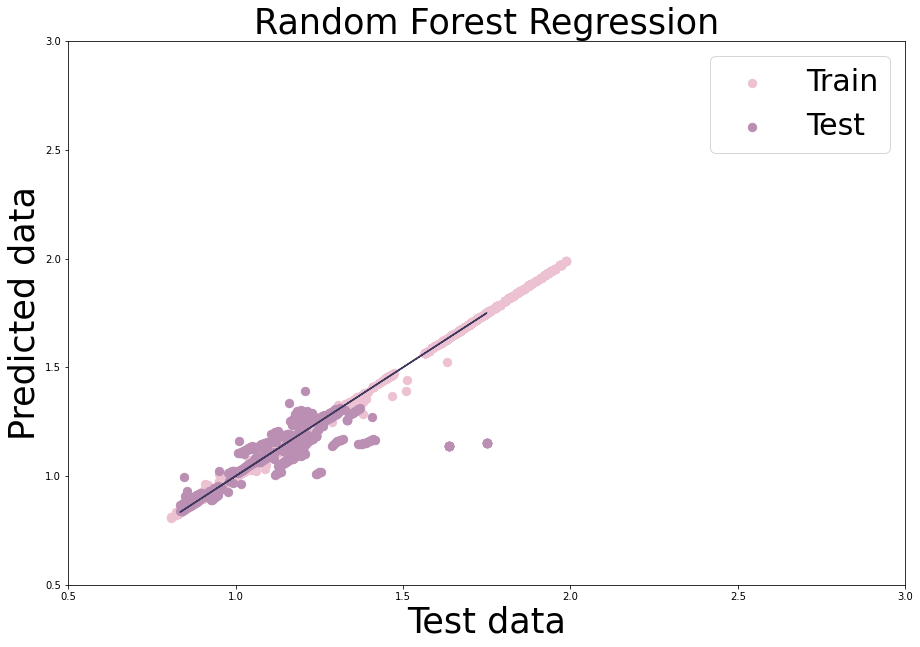

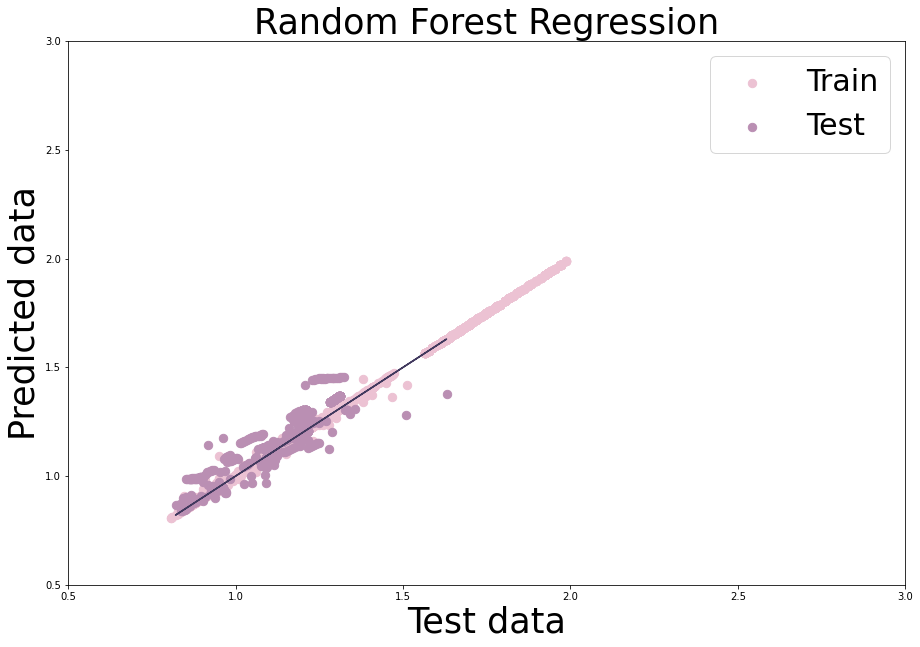

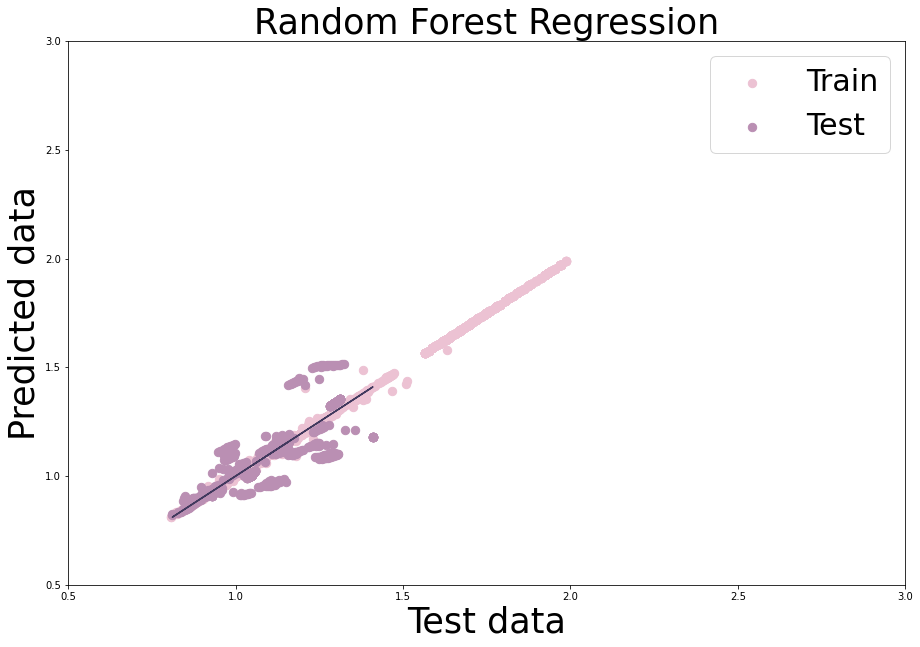

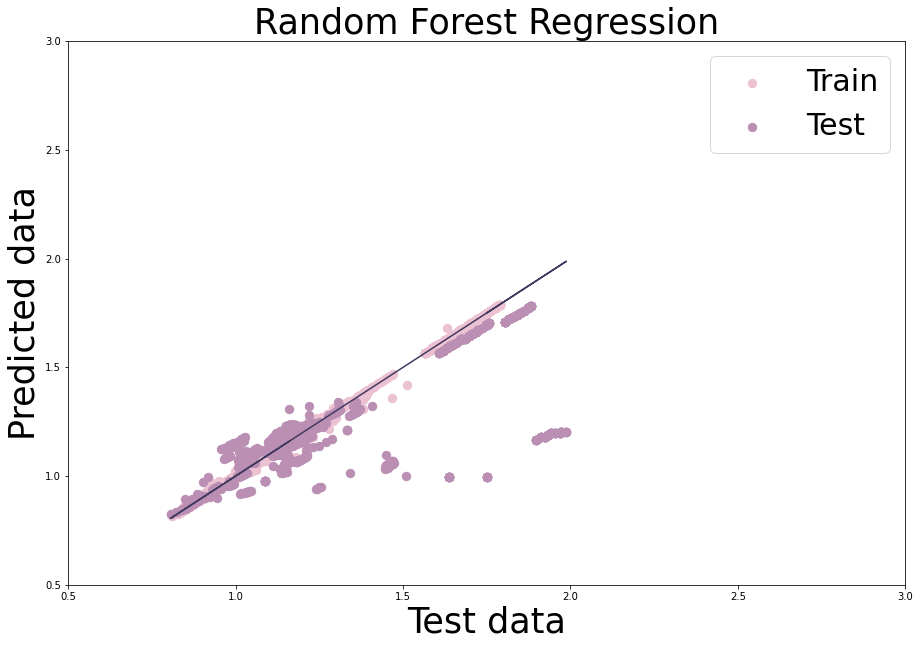

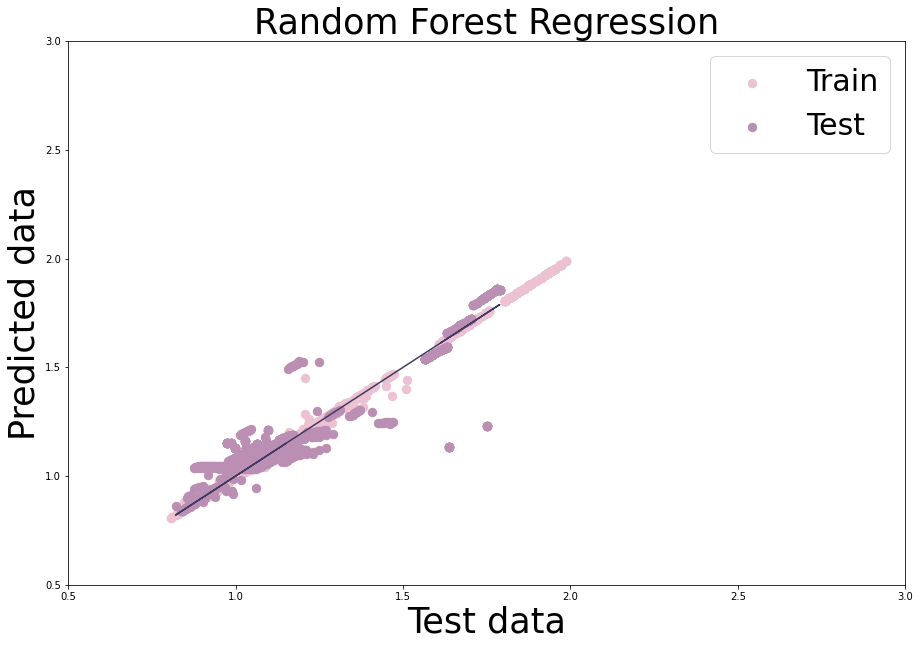

In [ ]:
count = 1
for train_idx, val_idx in cv:
    x_train_mod, x_test_mod = x_model.iloc[train_idx], x_model.iloc[val_idx]
    y_train_mod, y_test_mod = y_model.iloc[train_idx], y_model.iloc[val_idx]
    #Масштабируем данные 
    sc = MinMaxScaler(feature_range=(0, 1))
    x_train_mod = sc.fit_transform(x_train_mod)
    x_test_mod = sc.transform(x_test_mod)
    #Random Forest Regression
    regr_RFR = RandomForestRegressor()
    regr_RFR.fit(x_train_mod, y_train_mod)
    y_pred = regr_RFR.predict(x_test_mod)
    y1_pred = regr_RFR.predict(x_train_mod)
    #Рассчитываем метрики
    df_error_train['Random Forest Regression' + str(count)] = regr_metrics(regr_RFR, x_train_mod, y_train_mod, y_test_mod, y_pred, y1_pred)
    count +=1
    #Строим график
    regr_plot(y_train_mod, y_test_mod, y_pred, y1_pred)
    plt.title('Random Forest Regression', fontsize=35)
df_error_train

In [ ]:
#RFR
regr_RFR = RandomForestRegressor()
regr_RFR.fit(x_train, y_train)
y_pred = regr_RFR.predict(x_test)
y1_pred = regr_RFR.predict(x_train)

#Рассчитываем метрики
df_err['Random Forest Regression'] = regr_metrics(regr_RFR, x_train, y_train, y_test, y_pred, y1_pred)

#Строим график
regr_plot(y_train, y_test, y_pred, y1_pred)
plt.title('Random Forest Regression', fontsize=25)

In [ ]:
regr_feature(regr_RFR, x_test, list_columns)

In [ ]:
df_error_train.index = ['R2_train', 'R2_test', 'RMSE_train', 'RMSE_test']
df_error_train

,Linear Regression1,Linear Regression2,Linear Regression3,Linear Regression4,Linear Regression5,Gradient Boosting Regression1,Gradient Boosting Regression2,Gradient Boosting Regression3,Gradient Boosting Regression4,Gradient Boosting Regression5,...,Decision Tree Regression1,Decision Tree Regression2,Decision Tree Regression3,Decision Tree Regression4,Decision Tree Regression5,Random Forest Regression1,Random Forest Regression2,Random Forest Regression3,Random Forest Regression4,Random Forest Regression5
R2_train,0.919229,0.924160,0.915770,0.909611,0.898767,0.993045,0.992171,0.992549,0.987364,0.990971,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.999684,0.999569,0.999503,0.999225,0.999369
R2_test,0.563326,-3.654003,0.596893,-1.123048,0.872591,0.718370,0.641071,0.737721,0.463896,0.895707,...,4.313424e-01,3.189995e-01,4.808015e-02,5.265231e-01,7.047917e-01,0.576147,0.601627,0.588559,0.490959,0.882139
RMSE_train,0.070429,0.071760,0.071356,0.055408,0.072596,0.020666,0.023057,0.021223,0.020717,0.021681,...,1.762632e-16,1.684785e-16,1.717852e-16,1.403371e-16,1.582011e-16,0.004404,0.005410,0.005480,0.005132,0.005732
RMSE_test,0.102059,0.231043,0.095527,0.471066,0.092685,0.081962,0.064163,0.077054,0.236715,0.083856,...,1.164656e-01,8.837991e-02,1.467964e-01,2.224596e-01,1.410821e-01,0.100549,0.067597,0.096509,0.230663,0.089144


In [ ]:
#Построим график, который поможет сравнить методы по основным метрикам
df_error_train_1 = df_error_train.transpose()
f_get_name = lambda x: x[:-1]
df_error_train_1['Regr'] = df_error_train_1.index
df_error_train_1['Regr'] = df_error_train_1['Regr'].apply(f_get_name)
df_error_train_1 = df_error_train_1.groupby('Regr').agg(['mean', 'std'])
df_error_train_1.columns = ['_'.join(col).rstrip('_') for col in df_error_train_1.columns.values] #Названия для новых столбцов
df_error_train_1

,R2_train_mean,R2_train_std,R2_test_mean,R2_test_std,RMSE_train_mean,RMSE_train_std,RMSE_test_mean,RMSE_test_std
Regr,,,,,,,,
Cat Boosting Regression,0.999691,0.000111,0.721501,0.139501,3.989668e-03,1.771271e-04,0.109726,0.074692
Decision Tree Regression,1.000000,0.000000,0.405947,0.245010,1.630130e-16,1.431558e-17,0.143037,0.050048
Gradient Boosting Regression,0.991220,0.002288,0.691353,0.157246,2.146870e-02,9.793411e-04,0.108750,0.071946
Linear Regression,0.913508,0.009795,-0.548848,1.906688,6.830968e-02,7.254519e-03,0.198476,0.163135
Random Forest Regression,0.999470,0.000178,0.627886,0.148582,5.231521e-03,5.092888e-04,0.116892,0.064858


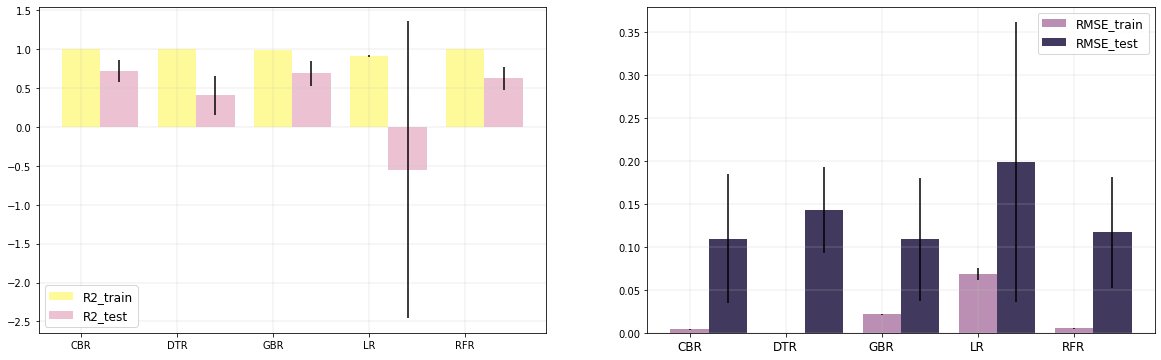

In [ ]:
#Построим график, который поможет сравнить методы по основным метрикам

barWidth = 0.4

br1 = np.arange(5)
br2 = [x + barWidth for x in br1]
br3 =  np.arange(5)
br4 = [x + barWidth for x in br3]

fig, ((ax1, ax2)) = plt.subplots(nrows=1, ncols=2, sharex=True, figsize=(20, 6))

ax1.bar(br1, df_error_train_1['R2_train_mean'], color =colors[1], width = barWidth, label ='R2_train', yerr = df_error_train_1['R2_train_std'])
ax1.bar(br2, df_error_train_1['R2_test_mean'], color =colors[2], width = barWidth, label ='R2_test', yerr = df_error_train_1['R2_test_std'])

ax2.bar(br3, df_error_train_1['RMSE_train_mean'], color =colors[3], width = barWidth, label ='RMSE_train', yerr = df_error_train_1['RMSE_train_std'])
ax2.bar(br4, df_error_train_1['RMSE_test_mean'], color =colors[0], width = barWidth, label ='RMSE_test', yerr = df_error_train_1['RMSE_test_std'])

plt.xticks(br1, ['CBR','DTR','GBR', 'LR','RFR'], fontsize = 12)
        
ax1.grid(color='#C3C6BA', linewidth=0.3)
ax2.grid(color='#C3C6BA', linewidth=0.3)
 
ax1.legend(fontsize = 12)
ax2.legend(fontsize = 12)
